****


## **Chinelo Osuji**
**Broward College**

[LinkedIn](https://linkedin.com/in/chineloosuji/)

****

****


# **McLeod Li Test**
### **For Autocorrelation of Squared Residuals**

$ Q(m) = T(T + 2) \sum_{k=1}^{m} \frac{\hat{r}_k^4}{T - k} $

where:

$Q(m)$ is the McLeod-Li test statistic, a measure used to detect nonlinearity and conditional heteroscedasticity (changes in variance) in a time series. The test is particularly useful for identifying the presence of ARCH (Autoregressive Conditional Heteroskedasticity) effects.

$T$ is the total number of observations in the time series. This is the length of the time series dataset, representing the number of sequential data points collected or observed.

$m$ is the number of lags considered in the test. This parameter determines how far back in time the test will look when examining autocorrelations for the presence of nonlinear characteristics or heteroscedasticity in the series.

$\hat{r}_k$ is the estimated autocorrelation at lag $k$. Autocorrelation measures the correlation of the time series with its own past values at different lags.

At each lag $k$, $\hat{r}_k$ quantifies the degree of correlation between values in the series separated by $k$ time periods.



****

In [ ]:
from scipy.stats import chi2

def mcleod_li_test(x, k):
    n = len(x)
    x_sq = x ** 2
    x_sum = np.sum(x_sq)
    x_lag_sum = np.sum(x_sq[:-k])
    test_stat = n * (n + 2) * x_lag_sum / (x_sum ** 2)
    df = k
    p_value = 1 - chi2.cdf(test_stat, df)
    return test_stat, p_value

In [ ]:
max_lags = 50
lags = range(1, max_lags + 1)
test_stats, p_values = zip(*[mcleod_li_test(residuals_cpi, lag) for lag in lags])

max_lags = 50
lags = range(1, max_lags + 1)
test_stats2, p_values2 = zip(*[mcleod_li_test(residuals_cpi2, lag) for lag in lags])

In [ ]:
test_stat, p_value = mcleod_li_test(residuals_cpi2, 20)
print("ARIMA McLeod-Li test statistic: ", test_stat)
print("p-value: ", p_value)

test_stat, p_value = mcleod_li_test(residuals_cpi, 20)
print("ARIMAX McLeod-Li test statistic: ", test_stat)
print("p-value: ", p_value)

ARIMA McLeod-Li test statistic:  43.70857619835902
p-value:  0.0016461401816071364
ARIMAX McLeod-Li test statistic:  46.995646549137604
p-value:  0.0005874102624553457


****



### **A p-value less than 0.05 shows that there is significant evidence against the null hypothesis of no autoregressive conditional heteroskedastic effects in the residuals.**

### **This means that the squared residuals of the ARIMA & ARIMAX models exhibit significant autocorrelation, suggesting potential ARCH effects.**

### **When ARCH effects are present, it means that the model may not be adequately capturing the dynamics of the data. Especially in regards to the volatility clustering where periods of high variance are followed by periods of high variance, and periods of low variance are followed by periods of low variance.**


### **To address this we will extend our models to include GARCH  terms to model the time-varying variance.**

### **Variance  quantifies how much the individual data points in a dataset deviate from the mean value of that dataset.**

### **The units of variance are the square of the units of the original data.**




****

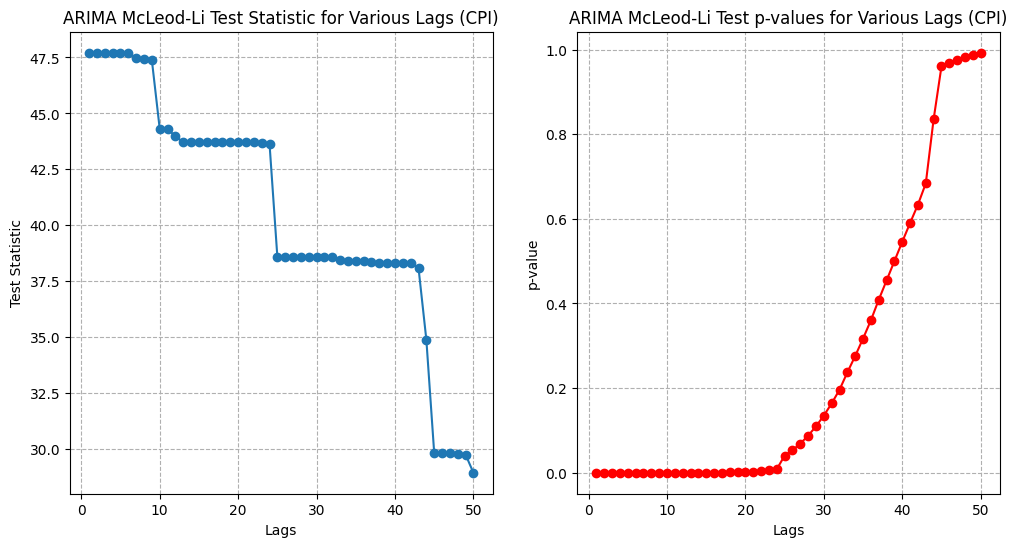

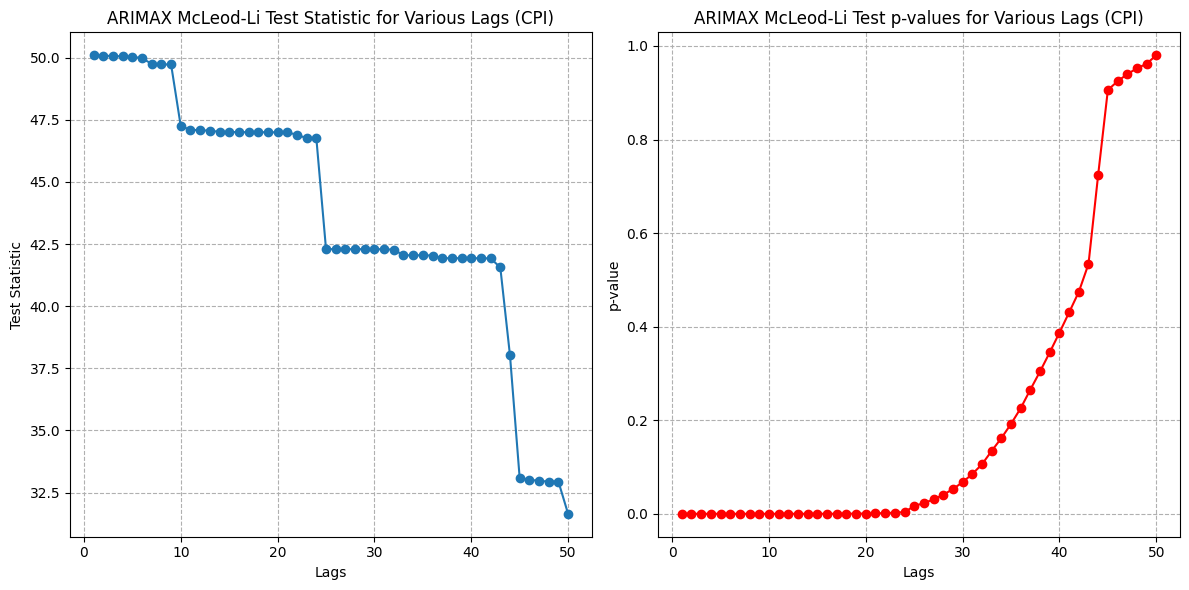

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lags, test_stats2, marker='o')
plt.xlabel('Lags')
plt.ylabel('Test Statistic')
plt.title('ARIMA McLeod-Li Test Statistic for Various Lags (CPI)')
plt.grid(True, linestyle='--')

plt.subplot(1, 2, 2)
plt.plot(lags, p_values2, marker='o', color='red')
plt.xlabel('Lags')
plt.ylabel('p-value')
plt.title('ARIMA McLeod-Li Test p-values for Various Lags (CPI)')
plt.grid(True, linestyle='--')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(lags, test_stats, marker='o')
plt.xlabel('Lags')
plt.ylabel('Test Statistic')
plt.title('ARIMAX McLeod-Li Test Statistic for Various Lags (CPI)')
plt.grid(True, linestyle='--')

plt.subplot(1, 2, 2)
plt.plot(lags, p_values, marker='o', color='red')
plt.xlabel('Lags')
plt.ylabel('p-value')
plt.title('ARIMAX McLeod-Li Test p-values for Various Lags (CPI)')
plt.grid(True, linestyle='--')

plt.tight_layout()
plt.show()

****

# **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**

### **Includes a function that models current volatility as a function of past volatilities and past squared residuals**

### **The idea of a GARCH model is that the variance of the current error term is a function of the previous periods' error terms and variances.**



The $\text{Autoregressive Conditional Heteroskedasticity (ARCH)}$ model is a foundational model used to describe the time-varying volatility in financial time series data. The basic ARCH model equation is given by:

$
\sigma_t^2 = \omega + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2
$

$\text{where:}$

$\sigma_t^2$: The conditional variance at time $t$, which represents the variance expected given the information up to time $t-1$.

$\omega$: The constant term representing the average impact on the variance that is not captured by the past squared residuals. This term is expected to be positive.

$\alpha_i$: The coefficients of the ARCH terms that measure the impact of past squared residuals on the current conditional variance. These terms capture the short-run persistence in volatility.

$\epsilon_{t-i}^2$: The squared residuals from the mean model at lag $i$. These are the past shocks to the series that are included to model the volatility clustering commonly observed in financial time series data.

$q$: The order of the ARCH terms, indicating the number of lagged squared residual terms included in the model.

$\text{Transformation to GARCH Model:}$



$\sigma_t^2 = \omega + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{p} \beta_j \sigma_{t-j}^2$

$\text{where:}$

$\sigma_t^2$: The conditional variance at time $t$, which is the variance expected given the information up to time $t-1$.

$\omega$: The constant term representing the average impact on the variance that is not captured by the past squared residuals or past variances. This term is expected to be positive.

$\alpha_i$: The coefficients of the ARCH terms that measure the impact of past squared residuals on the current conditional variance. These terms capture the short-run persistence in volatility.

$\epsilon_{t-i}^2$: The squared residuals from the mean model at lag $i$. These are the past shocks to the series that are included to model the volatility clustering commonly observed in financial time series data.

$\beta_j$: The GARCH coefficients that measure the impact of past conditional variances on the current conditional variance. These terms capture the long-run persistence in volatility.

$\sigma_{t-j}^2$: The conditional variances at lags $j$, which represent past predictions of the variance. They help to model the persistence of volatility shocks.

$p$: The order of the GARCH terms, indicating the number of lagged conditional variance terms included in the model.

$q$: The order of the ARCH terms, indicating the number of lagged squared residual terms included in the model.




****

****

**The non-normality and potential autocorrelation in the residuals of the ARIMA model can be better modeled with GARCH or EGARCH.**

**These models are designed to handle heteroskedasticity (changing variance) in time series data.**

**By modeling the conditional variance, they can adapt to shifts in volatility, which are often where non-normality and autocorrelation in residuals arise.**

****

In [ ]:
model_garch = arch_model(residuals_cpi2, mean='Zero', vol='Garch', p=1, q=1)
results_garch = model_garch.fit(disp='off')
print(results_garch.summary())
historical_volatility_garch = results_garch.conditional_volatility

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1438.18
Distribution:                  Normal   AIC:                           2882.36
Method:            Maximum Likelihood   BIC:                           2895.31
                                        No. Observations:                  555
Date:                Sun, Apr 21 2024   Df Residuals:                      555
Time:                        12:32:51   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0189  5.759e-02      0.327      0.743 

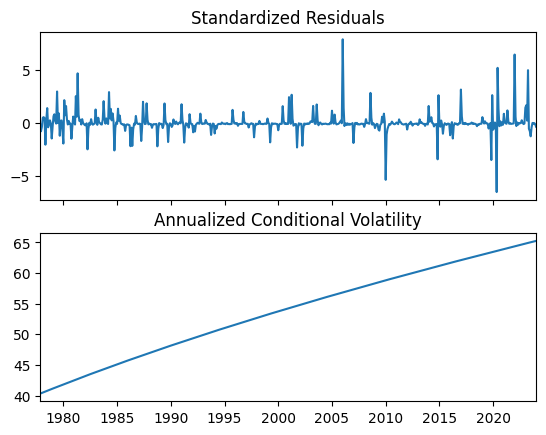

In [ ]:
fig = results_garch.plot(annualize='D')
plt.show()

****


# **Grid Search for GARCH Model**



****

In [ ]:
p_range = range(0, 3)
q_range = range(0, 3)

best_log_likelihood = -np.inf
best_aic = np.inf
best_bic = np.inf
best_p = 0
best_q = 0
best_model = None

for p in p_range:
    for q in q_range:
        try:
            model_garch = arch_model(residuals_cpi2, mean='Zero', vol='Garch', p=p, q=q)
            results_garch = model_garch.fit(disp='off')

            current_aic = results_garch.aic
            current_bic = results_garch.bic
            current_log_likelihood = results_garch.loglikelihood

            if (current_log_likelihood > best_log_likelihood) or \
               (current_log_likelihood == best_log_likelihood and current_aic < best_aic) or \
               (current_log_likelihood == best_log_likelihood and current_aic == best_aic and current_bic < best_bic):
                best_log_likelihood = current_log_likelihood
                best_aic = current_aic
                best_bic = current_bic
                best_p = p
                best_q = q
                best_model = results_garch

        except Exception as e:
            print(f"Could not fit GARCH({p},{q}) model: {e}")

if best_model:
    print(f"Best model GARCH({best_p},{best_q}) based on Log Likelihood, AIC, and BIC")
    print(best_model.summary())
    historical_volatility_garch = best_model.conditional_volatility
    residuals_garch_best = best_model.resid
else:
    print("No suitable model was found.")

Could not fit GARCH(0,0) model: One of p or o must be strictly positive
Could not fit GARCH(0,1) model: One of p or o must be strictly positive
Could not fit GARCH(0,2) model: One of p or o must be strictly positive
Best model GARCH(2,1) based on Log Likelihood, AIC, and BIC
                       Zero Mean - GARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -1438.18
Distribution:                  Normal   AIC:                           2884.36
Method:            Maximum Likelihood   BIC:                           2901.63
                                        No. Observations:                  555
Date:                Sun, Apr 21 2024   Df Residuals:                      555
Time:                        12:32:52   Df Model:                            0
             

****





### **Bonferroni Correction of GARCH(2,1) P-Values**

- Controls the Family-Wise Error Rate (FWER), the probability of making one or more false discoveries, or Type I errors, among all the hypotheses being tested.

- Highly stringent, reduces the likelihood of any false positives, crucial in high-stakes data analysis.
- Adjusts the significance level by the number of tests.
- Can be applied regardless of the dependence between statistical tests.

- Ensures the model's validity isn't compromised by Type I errors, where multiple coefficients are tested.


$\alpha_{\text{corrected}} = \frac{\alpha}{m}$

Where:
- $\alpha$ is the original level of significance (e.g., 0.15).
- $m$ is the number of hypotheses being tested.

### **Benjamini-Hochberg Correction of GARCH(2,1) P-Values**

- Controls the False Discovery Rate (FDR), the expected proportion of incorrect rejections among all rejections. Less conservative than controlling the FWER, allowing for a more balanced approach to Type I and Type II errors.


- Allows for more discoveries by being less stringent.
- Increases the test’s power by allowing more false positives, reducing Type II errors.
- Suitable for complex models with a large number of hypotheses.

- Helps identify potentially influential variables without excessive penalties for multiple testing.


$p(i) \leq \frac{i}{m} \times \alpha$

Where:
- $p(i)$ is the p-value for the $i$-th hypothesis, sorted from smallest to largest.
- $i$ is the rank of the hypothesis p-value.
- $m$ is the total number of hypotheses.
- $\alpha$ is the desired overall alpha level.




****

In [ ]:
p_values = best_model.pvalues

names = best_model.params.index

bonferroni_results = multipletests(p_values, alpha=0.15, method='bonferroni')
print("Bonferroni Corrected p-values:")
for name, p_value, bf_corrected_p_value in zip(names, p_values, bonferroni_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bf_corrected_p_value:.6f}")

bh_results = multipletests(p_values, alpha=0.15, method='fdr_bh')
print("Benjamini-Hochberg Corrected p-values:")
for name, p_value, bh_corrected_p_value in zip(names, p_values, bh_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bh_corrected_p_value:.6f}")

df_results = pd.DataFrame({
    'GARCH (2,1) Coefficient': names,
    'Original P-Value': p_values,
    'Bonferroni Corrected P-Value': bonferroni_results[1],
    'BH Corrected P-Value': bh_results[1]
})

df_results

Bonferroni Corrected p-values:
omega: original p-value = 0.743310, corrected p-value = 1.000000
alpha[1]: original p-value = 1.000000, corrected p-value = 1.000000
alpha[2]: original p-value = 0.999996, corrected p-value = 1.000000
beta[1]: original p-value = 0.000000, corrected p-value = 0.000000
Benjamini-Hochberg Corrected p-values:
omega: original p-value = 0.743310, corrected p-value = 1.000000
alpha[1]: original p-value = 1.000000, corrected p-value = 1.000000
alpha[2]: original p-value = 0.999996, corrected p-value = 1.000000
beta[1]: original p-value = 0.000000, corrected p-value = 0.000000


,"GARCH (2,1) Coefficient",Original P-Value,Bonferroni Corrected P-Value,BH Corrected P-Value
omega,omega,0.743310,1.0,1.0
alpha[1],alpha[1],1.000000,1.0,1.0
alpha[2],alpha[2],0.999996,1.0,1.0
beta[1],beta[1],0.000000,0.0,0.0


****

# **GARCH (2,1) Predicted Volatility**



****

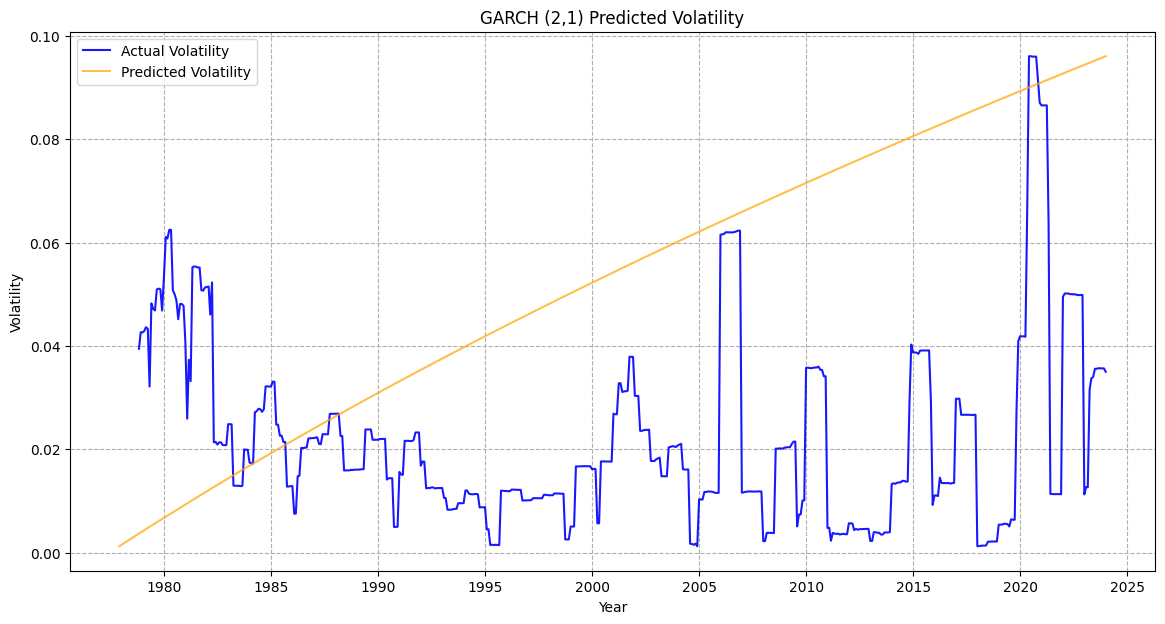

GARCH (2,1) MAPE: 544.3584538506077
GARCH (2,1) RMSE: 0.045034257602883036
GARCH (2,1) MAE: 0.03832668526255477
GARCH (2,1) MSE: 0.0020280843578428286
GARCH (2,1) Average MAD: 0.0383
GARCH (2,1) Hit Rate: 0.471971066908
GARCH (2,1) Low Volatility Error Variance: 0.000377
GARCH (2,1) Medium Volatility Error Variance: 0.000446
GARCH (2,1) High Volatility Error Variance: 0.000351


,Actual Volatility,"GARCH (2,1) Predicted Volatility"
DATE,,
2022-07-01,0.049968,0.093552
2022-08-01,0.049992,0.093692
2022-09-01,0.049840,0.093832
2022-10-01,0.049843,0.093972
2022-11-01,0.049854,0.094112
2022-12-01,0.049870,0.094252
2023-01-01,0.011270,0.094392
2023-02-01,0.012684,0.094531
2023-03-01,0.012648,0.094671


In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()

predicted_volatility = historical_volatility_garch

min_length = min(len(actual_volatility), len(predicted_volatility))
actual_volatility = actual_volatility[-min_length:]
predicted_volatility = predicted_volatility[-min_length:]

actual_min, actual_max = actual_volatility.min(), actual_volatility.max()
predicted_min, predicted_max = predicted_volatility.min(), predicted_volatility.max()

predicted_volatility_scaled = ((predicted_volatility - predicted_min) / (predicted_max - predicted_min)) \
                              * (actual_max - actual_min) + actual_min

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.9)
plt.plot(predicted_volatility.index, predicted_volatility_scaled, label='Predicted Volatility', color='orange', alpha=0.7)
plt.title('GARCH (2,1) Predicted Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

mape_garch = np.mean(np.abs((actual_volatility - predicted_volatility_scaled) / actual_volatility)) * 100
rmse_garch = np.sqrt(np.mean((actual_volatility - predicted_volatility_scaled)**2))
mae_garch = np.mean(np.abs(actual_volatility - predicted_volatility_scaled))
mse_garch = np.mean((actual_volatility - predicted_volatility_scaled)**2)
mad_garch = np.mean(np.abs(actual_volatility - predicted_volatility_scaled))

print("GARCH (2,1) MAPE:", mape_garch)
print("GARCH (2,1) RMSE:", rmse_garch)
print("GARCH (2,1) MAE:", mae_garch)
print("GARCH (2,1) MSE:", mse_garch)
print(f"GARCH (2,1) Average MAD: {mad_garch:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_volatility)):
    actual_direction = np.sign(actual_volatility.iloc[i] - actual_volatility.iloc[i-1])
    predicted_direction = np.sign(predicted_volatility_scaled.iloc[i] - predicted_volatility_scaled.iloc[i-1])
    if actual_direction == predicted_direction and actual_direction != 0:
        hits += 1
    total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"GARCH (2,1) Hit Rate: {hit_rate:.12f}")

market_conditions = np.percentile(actual_volatility.dropna(), [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for actual, predicted in zip(actual_volatility.dropna(), predicted_volatility_scaled.dropna()):
    error = np.abs(actual - predicted)
    if actual <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif market_conditions[0] < actual <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"GARCH (2,1) Low Volatility Error Variance: {np.nanvar(low_volatility_errors):.6f}")
print(f"GARCH (2,1) Medium Volatility Error Variance: {np.nanvar(medium_volatility_errors):.6f}")
print(f"GARCH (2,1) High Volatility Error Variance: {np.nanvar(high_volatility_errors):.6f}")

volatility_df = pd.DataFrame({
    'Actual Volatility': actual_volatility,
    'GARCH (2,1) Predicted Volatility': predicted_volatility_scaled
})

volatility_df.fillna(0, inplace=True)
volatility_df.iloc[535:]

****

# **GARCH (2,1) Forecasted Volatility**



****

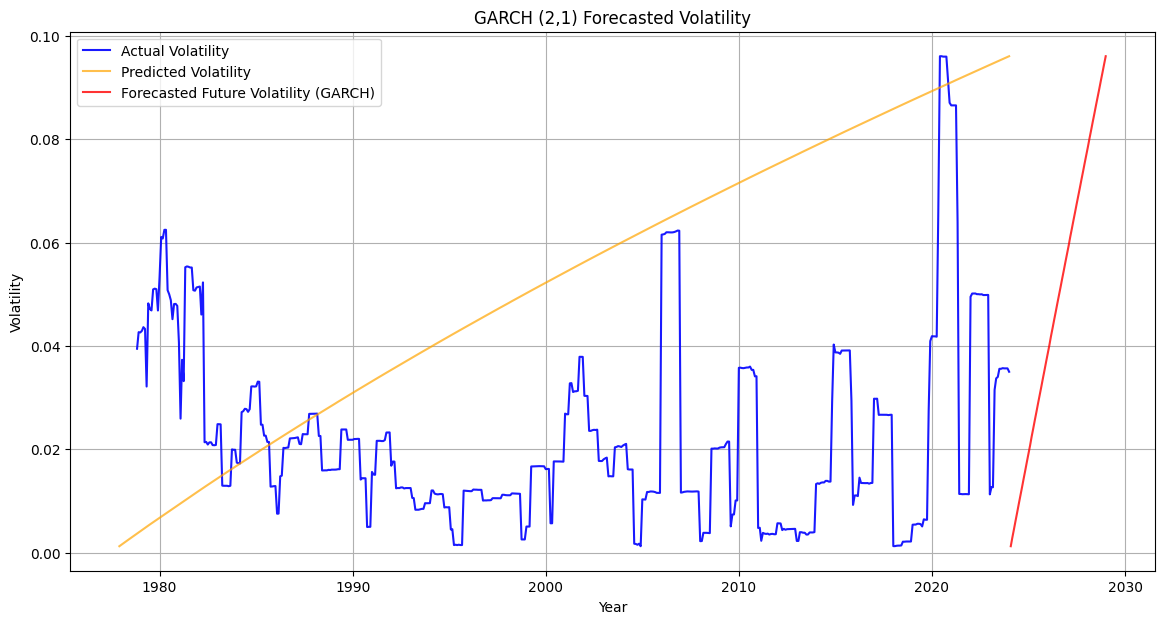

,Actual Volatility,"GARCH (2,1) Predicted Volatility","GARCH (2,1) Forecasted Volatility"
2023-11-01,0.035650,0.095785,0.000000
2023-12-01,0.035651,0.095924,0.000000
2024-01-01,0.034998,0.096063,0.000000
2024-02-01,0.000000,0.000000,0.001234
2024-03-01,0.000000,0.000000,0.002867
2024-04-01,0.000000,0.000000,0.004499
2024-05-01,0.000000,0.000000,0.006130
2024-06-01,0.000000,0.000000,0.007760
2024-07-01,0.000000,0.000000,0.009389
2024-08-01,0.000000,0.000000,0.011018


In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()

predicted_volatility = historical_volatility_garch

min_length = min(len(actual_volatility), len(predicted_volatility))
actual_volatility = actual_volatility[-min_length:]
predicted_volatility = predicted_volatility[-min_length:]

actual_min, actual_max = actual_volatility.min(), actual_volatility.max()
predicted_min, predicted_max = predicted_volatility.min(), predicted_volatility.max()

predicted_volatility_scaled = ((predicted_volatility - predicted_min) / (predicted_max - predicted_min)) \
                              * (actual_max - actual_min) + actual_min

future_min, future_max = future_volatility_scaled_garch.min(), future_volatility_scaled_garch.max()

future_volatility_scaled = ((future_volatility_scaled_garch - future_min) / (future_max - future_min)) \
                           * (actual_max - actual_min) + actual_min

last_historical_date = actual_volatility.index[-1]

start_of_next_month = pd.date_range(start=last_historical_date, periods=2, freq='MS')[1]

future_dates = pd.date_range(start=start_of_next_month, periods=len(future_volatility_scaled), freq='MS')

if len(future_dates) != len(future_volatility_scaled):
    future_dates = pd.date_range(start=start_of_next_month,
                                 periods=len(future_volatility_scaled),
                                 freq='MS')

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.9)
plt.plot(predicted_volatility.index, predicted_volatility_scaled, label='Predicted Volatility', color='orange', alpha=0.7)
plt.plot(future_dates, future_volatility_scaled, label='Forecasted Volatility', color='red', alpha=0.8)
plt.title('GARCH (2,1) Forecasted Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

future_volatility_scaled = pd.Series(future_volatility_scaled, index=future_dates)

combined_index = actual_volatility.index.union(future_dates)

actual_volatility_reindexed = actual_volatility.reindex(combined_index)
predicted_volatility_scaled_reindexed = predicted_volatility_scaled.reindex(combined_index)

volatility_df = pd.DataFrame({
    'Actual Volatility': actual_volatility_reindexed,
    'GARCH (2,1) Predicted Volatility': predicted_volatility_scaled_reindexed,
    'GARCH (2,1) Forecasted Volatility': future_volatility_scaled
})

volatility_df.fillna(0, inplace=True)
volatility_df.iloc[551:572]

****


# **GARCH (2,1) Expanding Window Cross-Validation (EWCV)**



Expanding Window Cross-Validation (EWCV) is ideal for time-series data where the goal is to assess the model's performance over time as more data becomes available. It simulates a real-world scenario where predictions are continually updated with incoming data. EWCV allows the model to learn from the most recent volatility patterns, accommodating shifts in market conditions and volatility clustering.

\\

EWCV involves progressively expanding the size of the training dataset, starting from a minimum size necessary to train the model, and increasing the training set by one observation at each step. This approach is particularly useful in dynamic environments like financial markets where volatility patterns evolve over time.

\\


$T$ = Total number of observations in the time series \\
$N$ = Initial size of the training set \\
$P$ = Total number of predictions to make \\
Training starts with the first $N$ observations, and for each subsequent prediction, the window expands to include one more past observation.

The process can be defined as follows:
- For each $i$ from $N+1$ to $T$:
  - Training data: $X_{train} = \{X_1, ..., X_i\}$
  - Test data: $X_{test} = \{X_{i+1}\}$
  - Fit model on $X_{train}$ and predict for $X_{test}$


\\







****

In [ ]:
initial_window = 12 * 5

GARCH (2,1) Average MAE: 2.5020
GARCH (2,1) Average MSE: 6.8147
GARCH (2,1) Average RMSE: 2.6105
GARCH (2,1) Average MAPE: 28084.8731
GARCH (2,1) Average MAD: 2.5020
GARCH (2,1) Hit Rate: 0.398340248963
GARCH (2,1) Low Volatility Error Variance: 0.9004
GARCH (2,1) Medium Volatility Error Variance: 0.3836
GARCH (2,1) High Volatility Error Variance: 0.3710


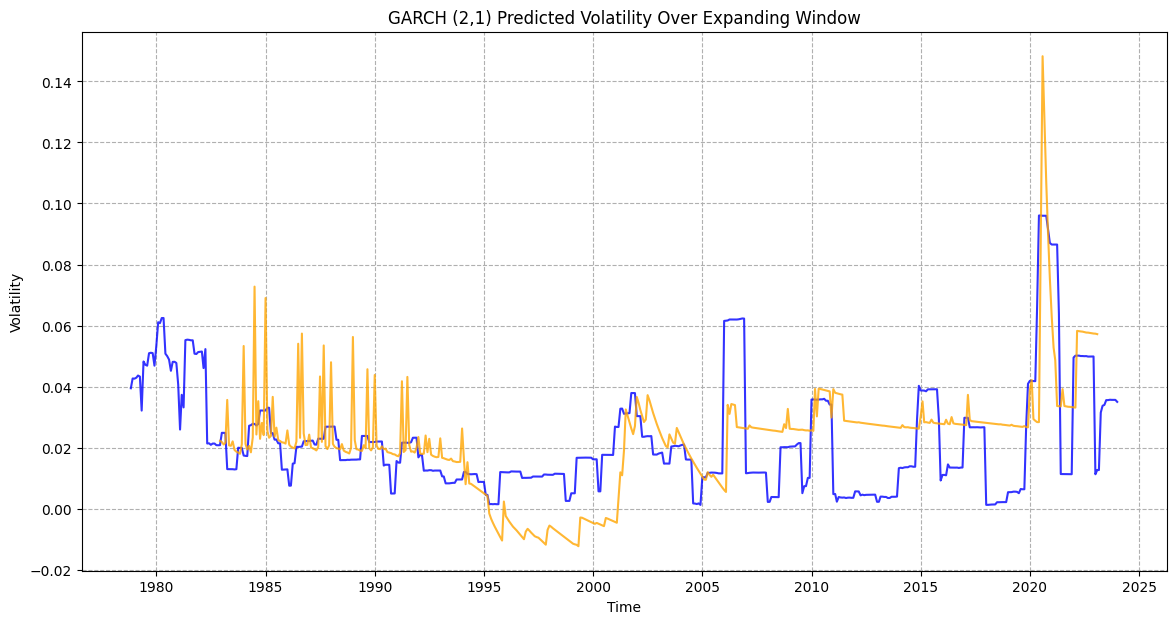

In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()
actual_volatility_df = pd.DataFrame(actual_volatility, index=cpi_pct_change.index, columns=['Actual Volatility'])
predictions_df = pd.DataFrame(index=actual_volatility_df.index[initial_window:], columns=['Predicted Volatility'])

mae_values = []
mse_values = []
mape_values = []
mad_values = []
actual_values = []
forecasted_values = []

for start in range(initial_window, len(actual_volatility_df) - window_size + 1):
    train_data = residuals_cpi2[:start]
    model_garch = arch_model(train_data, mean='Zero', vol='Garch', p=2, q=1)
    results_garch = model_garch.fit(disp='off')
    forecast = results_garch.forecast(horizon=1)
    forecasted_volatility = np.sqrt(forecast.variance.iloc[-1][-1])
    predictions_df.iloc[start - initial_window, 0] = forecasted_volatility
    if not np.isnan(actual_volatility.iloc[start + window_size - 1]):
        actual_values.append(actual_volatility.iloc[start + window_size - 1])
        forecasted_values.append(forecasted_volatility)

mean_actual = actual_volatility.mean()
std_actual = actual_volatility.std()
predictions_df['Predicted Volatility Scaled'] = predictions_df['Predicted Volatility'].astype(float).sub(predictions_df['Predicted Volatility'].astype(float).mean()).div(predictions_df['Predicted Volatility'].astype(float).std()).mul(std_actual).add(mean_actual)

for actual, predicted in zip(actual_values, forecasted_values):
    mape_values.append(np.abs((actual - predicted) / actual) * 100 if actual != 0 else np.nan)
    mse_values.append((actual - predicted) ** 2)
    mae_values.append(np.abs(actual - predicted))
    mad_values.append(np.abs(actual - predicted))

average_mape = np.nanmean(mape_values)
average_mse = np.nanmean(mse_values)
average_mae = np.nanmean(mae_values)
average_rmse = np.sqrt(average_mse)
average_mad = np.nanmean(mad_values)

print(f'GARCH (2,1) Average MAE: {average_mae:.4f}')
print(f'GARCH (2,1) Average MSE: {average_mse:.4f}')
print(f'GARCH (2,1) Average RMSE: {average_rmse:.4f}')
print(f'GARCH (2,1) Average MAPE: {average_mape:.4f}')
print(f"GARCH (2,1) Average MAD: {average_mad:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_values)):
    actual_direction = np.sign(actual_values[i] - actual_values[i-1])
    forecast_direction = np.sign(forecasted_values[i] - forecasted_values[i-1])
    if actual_direction == forecast_direction and actual_direction != 0:
        hits += 1
    total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"GARCH (2,1) Hit Rate: {hit_rate:.12f}")

market_conditions = np.percentile(actual_values, [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for actual, forecast in zip(actual_values, forecasted_values):
    error = np.abs(actual - forecast)
    if actual <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif actual <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"GARCH (2,1) Low Volatility Error Variance: {np.var(low_volatility_errors):.4f}")
print(f"GARCH (2,1) Medium Volatility Error Variance: {np.var(medium_volatility_errors):.4f}")
print(f"GARCH (2,1) High Volatility Error Variance: {np.var(high_volatility_errors):.4f}")

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.8)
plt.plot(predictions_df.index, predictions_df['Predicted Volatility Scaled'], label='Scaled Predicted Volatility', color='orange', alpha=0.8)
plt.title('GARCH (2,1) Predicted Volatility Over Expanding Window')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--')
plt.show()

****


# **GARCH (2,1) Purged Cross-Validation (PCV)**



Purged Cross-Validation (PCV) is a methodology designed to eliminate lookahead bias and overfitting in the validation process, particularly critical in the domain of financial time-series for volatility predictions. This method adjusts for the leakage of information between train and test datasets that may occur due to the temporal proximity of financial data.


PCV enhances traditional cross-validation by introducing a "purging" and "embargo" period between the training and validation datasets to further reduce data leakage and mimic realistic trading scenarios.

In financial time series, volatility clustering must be considered where high-volatility periods tend to follow high-volatility periods. PCV can be designed to handle clusters by adjusting $\tau$ and $\epsilon$ based on volatility estimators.


$T$ = Total number of observations in the dataset \\
$k$ = Number of folds in cross-validation \\
$n$ = $\frac{T}{k}$ (size of each fold, typically equal) \\
$\tau$ = Purge gap (number of observations to skip between train and test sets) \\
$\epsilon$ = Embargo period (additional gap post-test period to avoid contamination from post-test data)

Data partitions are structured as follows:
- For each fold $i$, where $i \in \{1, 2, ..., k\}$:
  - Training data: $X_{train} = \{X_1, ..., X_{(i-1) \cdot n - \tau}\}$
  - Validation data: $X_{test} = \{X_{(i-1) \cdot n + \tau + 1}, ..., X_{i \cdot n}\}$
  - Post-validation embargo: $X_{embargo} = \{X_{i \cdot n + 1}, ..., X_{i \cdot n + \epsilon}\}$






****

GARCH (2,1) Average MAE: 2.5776
GARCH (2,1) Average MSE: 7.0400
GARCH (2,1) Average RMSE: 2.6533
GARCH (2,1) Average MAPE: 29441.2568
GARCH (2,1) Average MAD: 2.5776
GARCH (2,1) Hit Rate: 0.5352
GARCH (2,1) Low Volatility Error Variance: 0.0001
GARCH (2,1) Medium Volatility Error Variance: 0.0001
GARCH (2,1) High Volatility Error Variance: 0.0004


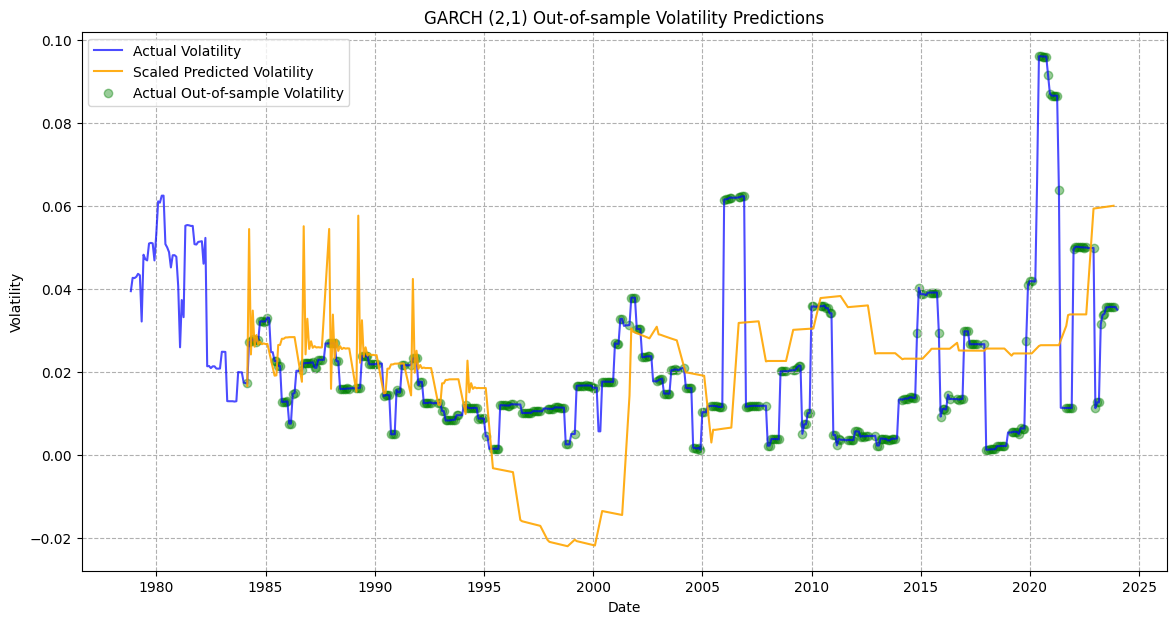

In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12

actual_volatility = cpi_pct_change.rolling(window=window_size).std()

out_sample_length = 12
purge_length = 3

mae_values = []
mse_values = []
mape_values = []

first_valid_index = actual_volatility.dropna().index[0]
initial_window = 60

forecasted_values = []
actual_values = []
forecast_dates = []

all_forecasts = []
all_actuals = []

for start in range(initial_window, len(cpi_pct_change) - out_sample_length, out_sample_length + purge_length):
    end_train = start + out_sample_length
    start_test = end_train + purge_length

    if start_test + out_sample_length > len(cpi_pct_change):
        continue

    train_data = residuals_cpi2.iloc[:end_train]

    model_garch = arch_model(train_data, mean='Zero', vol='Garch', p=2, q=1)
    results_garch = model_garch.fit(disp='off')

    forecasts = results_garch.forecast(horizon=out_sample_length)

    if not forecasts.variance.dropna().empty:
        forecasted_variances = forecasts.variance.dropna().iloc[-1]
        forecasted_volatilities = np.sqrt(forecasted_variances)

        forecasted_values.extend(forecasted_volatilities)
        actual_values.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].values)
        forecast_dates.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].index)

        actual_test_volatility = actual_volatility.iloc[start_test:start_test + out_sample_length].values

        all_forecasts.extend(forecasted_volatilities)
        all_actuals.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].values)

        mae = mean_absolute_error(actual_test_volatility, forecasted_volatilities)
        mse = mean_squared_error(actual_test_volatility, forecasted_volatilities)

        mae_values.append(mae)
        mse_values.append(mse)

        mape = np.mean(np.abs((actual_test_volatility - forecasted_volatilities) / actual_test_volatility)) * 100
        mape_values.append(mape)
    else:
        print(f"No forecast available for start index: {start_test}")

mean_actual = np.nanmean(all_actuals)
std_actual = np.nanstd(all_actuals)

std_forecasts = np.nanstd(all_forecasts)
if std_forecasts == 0:
    std_forecasts = 1

scaled_forecasts = [(f - np.nanmean(all_forecasts)) / std_forecasts * std_actual + mean_actual for f in all_forecasts]


average_mae = np.mean(mae_values)
average_mse = np.mean(mse_values)
average_rmse = np.sqrt(average_mse)
average_mape = np.mean(mape_values)

print(f"GARCH (2,1) Average MAE: {average_mae:.4f}")
print(f"GARCH (2,1) Average MSE: {average_mse:.4f}")
print(f"GARCH (2,1) Average RMSE: {average_rmse:.4f}")
print(f"GARCH (2,1) Average MAPE: {average_mape:.4f}")

mad_values = []
for i in range(len(forecasted_values)):
    if not np.isnan(actual_values[i]):
        mad = np.abs(forecasted_values[i] - actual_values[i])
        mad_values.append(mad)

average_mad = np.nanmean(mad_values)
print(f"GARCH (2,1) Average MAD: {average_mad:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_values)):
    if not np.isnan(actual_values[i]) and not np.isnan(actual_values[i-1]) and not np.isnan(forecasted_values[i]):
        actual_change = actual_values[i] > actual_values[i-1]
        forecast_change = forecasted_values[i] > forecasted_values[i-1]
        if actual_change == forecast_change:
            hits += 1
        total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"GARCH (2,1) Hit Rate: {hit_rate:.4f}")

market_conditions = np.percentile(all_actuals, [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for i in range(len(all_actuals)):
    error = np.abs(all_actuals[i] - scaled_forecasts[i])
    if all_actuals[i] <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif all_actuals[i] <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"GARCH (2,1) Low Volatility Error Variance: {np.var(low_volatility_errors):.4f}")
print(f"GARCH (2,1) Medium Volatility Error Variance: {np.var(medium_volatility_errors):.4f}")
print(f"GARCH (2,1) High Volatility Error Variance: {np.var(high_volatility_errors):.4f}")

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.7)
plt.plot(forecast_dates, scaled_forecasts, color='orange', label='Scaled Predicted Volatility', alpha=0.9)
plt.scatter(forecast_dates, all_actuals, color='green', label='Actual Out-of-sample Volatility', alpha=0.4)
plt.title('GARCH (2,1) Out-of-sample Volatility Predictions')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

****

# **EGARCH (Exponential Generalized Autoregressive Conditional Heteroskedasticity)**

### **Used to capture the asymmetric impact of positive and negative shocks on volatility.**

### **It allows the effect of a negative shock to be different from that of a positive shock of the same magnitude.**

### **It uses an exponential function and models the natural logarithm of conditional variance.**

$\log(\sigma_t^2) = \omega + \sum_{i=1}^{q} \alpha_i g(\epsilon_{t-i}) + \sum_{j=1}^{p} \beta_j \log(\sigma_{t-j}^2)$ \\
$g(\epsilon_t) = \theta \epsilon_t + \gamma ( |\epsilon_t| - E[|\epsilon_t|] )$

$\text{where:}$

$\sigma_t^2$: The conditional variance at time $t$, representing the variance forecast given all past information.

$\omega$: A constant term which affects the level of the log-variance.

$\alpha_i$: Coefficients of the lagged terms in the model that capture the effect of past shocks (residuals) on current volatility.

$\beta_j$: Coefficients of the lagged conditional variances which capture the persistence in volatility.

$\epsilon_t$: The residual from the mean model at time $t$, representing the difference between the actual value and the predicted value by the model.

$\theta, \gamma$: Parameters capturing the asymmetry in the impact of positive and negative shocks on volatility.

$|\epsilon_t|$: The absolute value of the residual at time $t$, representing the magnitude of the shock irrespective of its direction.

$E[|\epsilon_t|]$: The expected value of the absolute residual, representing a normal level of shock magnitude.

$p$: The order of the lagged conditional variance terms in the model.

$q$: The order of the lagged shock (residual) terms in the model.




****

In [ ]:
model_egarch = arch_model(residuals_cpi2, mean='Zero', vol='EGarch', p=1, q=1)
results_egarch = model_egarch.fit(disp='off')
historical_volatility_egarch = results_egarch.conditional_volatility
print(results_egarch.summary())

                       Zero Mean - EGARCH Model Results                       
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                     EGARCH   Log-Likelihood:               -1459.80
Distribution:                  Normal   AIC:                           2925.61
Method:            Maximum Likelihood   BIC:                           2938.56
                                        No. Observations:                  555
Date:                Sun, Apr 21 2024   Df Residuals:                      555
Time:                        22:06:10   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.0328      1.362      1.492      0.136    [ -

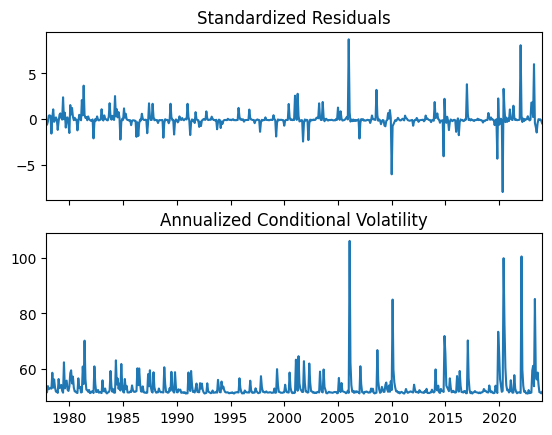

In [ ]:
fig = results_egarch.plot(annualize='D')
plt.show()

****


# **Grid Search for EGARCH Model**


****

In [ ]:
p_range = range(0, 3)
q_range = range(0, 3)

best_log_likelihood = -np.inf
best_aic = np.inf
best_bic = np.inf
best_p = 0
best_q = 0
best_model = None

for p in p_range:
    for q in q_range:
        try:
            model_egarch = arch_model(residuals_cpi2, mean='Zero', vol='EGarch', p=p, q=q)
            results_egarch = model_egarch.fit(disp='off')

            current_aic = results_egarch.aic
            current_bic = results_egarch.bic
            current_log_likelihood = results_egarch.loglikelihood

            if (current_log_likelihood > best_log_likelihood) or \
               (current_log_likelihood == best_log_likelihood and current_aic < best_aic) or \
               (current_log_likelihood == best_log_likelihood and current_aic == best_aic and current_bic < best_bic):
                best_log_likelihood = current_log_likelihood
                best_aic = current_aic
                best_bic = current_bic
                best_p = p
                best_q = q
                best_model = results_egarch
                best_model_egarch = best_model

        except Exception as e:
            print(f"Could not fit EGARCH({p},{q}) model: {e}")

if best_model:
    print(f"Best model EGARCH({best_p},{best_q}) based on Log Likelihood, AIC, and BIC")
    print(best_model_egarch.summary())
    historical_volatility_egarch = best_model_egarch.conditional_volatility
    residuals_egarch_best = best_model_egarch.resid
else:
    print("No suitable model was found.")

Could not fit EGARCH(0,0) model: One of p or o must be strictly positive
Could not fit EGARCH(0,1) model: One of p or o must be strictly positive
Could not fit EGARCH(0,2) model: One of p or o must be strictly positive


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Best model EGARCH(2,2) based on Log Likelihood, AIC, and BIC
                       Zero Mean - EGARCH Model Results                       
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                     EGARCH   Log-Likelihood:               -1360.48
Distribution:                  Normal   AIC:                           2730.97
Method:            Maximum Likelihood   BIC:                           2752.56
                                        No. Observations:                  555
Date:                Sun, Apr 21 2024   Df Residuals:                      555
Time:                        22:06:13   Df Model:                            0
                               Volatility Model                               
                 coef    std err          t      P>|t|        95.0% Conf. Int.
----------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


****



# **Bonferroni and Benjamini-Hochberg Corrections of EGARCH (2,2) P-Values**



****

In [ ]:
p_values = best_model.pvalues

names = best_model.params.index

bonferroni_results = multipletests(p_values, alpha=0.15, method='bonferroni')
print("Bonferroni Corrected p-values:")
for name, p_value, bf_corrected_p_value in zip(names, p_values, bonferroni_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bf_corrected_p_value:.6f}")

bh_results = multipletests(p_values, alpha=0.15, method='fdr_bh')
print("Benjamini-Hochberg Corrected p-values:")
for name, p_value, bh_corrected_p_value in zip(names, p_values, bh_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bh_corrected_p_value:.6f}")

df_results = pd.DataFrame({
    'EGARCH (2,2) Coefficient': names,
    'Original P-Value': p_values,
    'Bonferroni Corrected P-Value': bonferroni_results[1],
    'BH Corrected P-Value': bh_results[1]
})

df_results

Bonferroni Corrected p-values:
omega: original p-value = 0.000000, corrected p-value = 0.000000
alpha[1]: original p-value = 0.000000, corrected p-value = 0.000000
alpha[2]: original p-value = 0.000000, corrected p-value = 0.000000
beta[1]: original p-value = 0.000000, corrected p-value = 0.000000
beta[2]: original p-value = 0.000000, corrected p-value = 0.000000
Benjamini-Hochberg Corrected p-values:
omega: original p-value = 0.000000, corrected p-value = 0.000000
alpha[1]: original p-value = 0.000000, corrected p-value = 0.000000
alpha[2]: original p-value = 0.000000, corrected p-value = 0.000000
beta[1]: original p-value = 0.000000, corrected p-value = 0.000000
beta[2]: original p-value = 0.000000, corrected p-value = 0.000000


,"EGARCH (2,2) Coefficient",Original P-Value,Bonferroni Corrected P-Value,BH Corrected P-Value
omega,omega,0.0,0.0,0.0
alpha[1],alpha[1],0.0,0.0,0.0
alpha[2],alpha[2],0.0,0.0,0.0
beta[1],beta[1],0.0,0.0,0.0
beta[2],beta[2],0.0,0.0,0.0


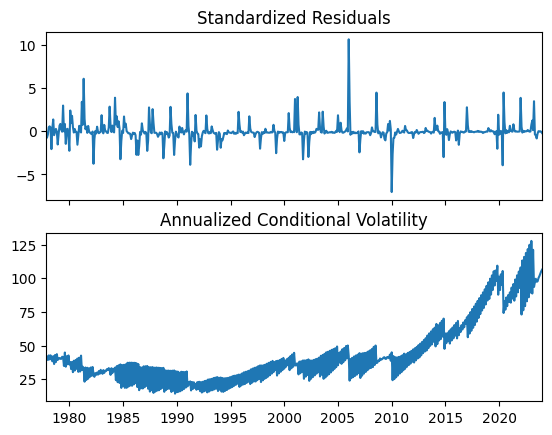

In [ ]:
fig = best_model_egarch.plot(annualize='D')
plt.show()

****

# **EGARCH (2,2) Predicted Volatility**



****

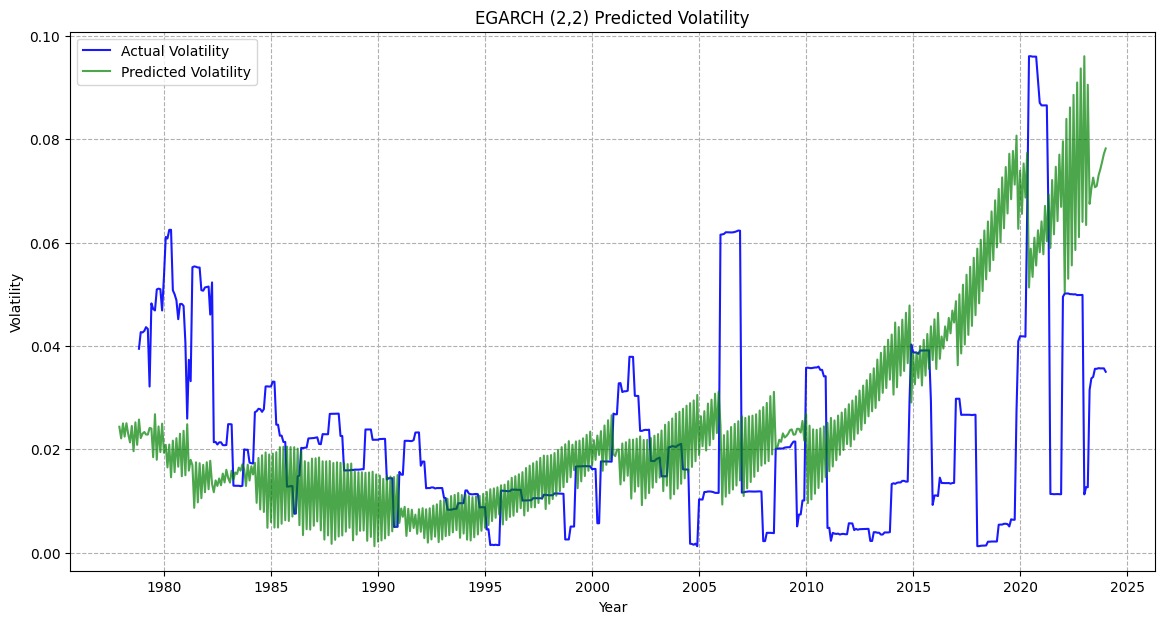

EGARCH (2,2) MAPE: 233.07343308908676
EGARCH (2,2) RMSE: 0.024156802624712027
EGARCH (2,2) MAE: 0.0179438152102544
EGARCH (2,2) MSE: 0.0005835511130492939
EGARCH (2,2) Average MAD: 0.0179
EGARCH (2,2) Hit Rate: 0.401446654611
EGARCH (2,2) Low Volatility Error Variance: 0.000262
EGARCH (2,2) Medium Volatility Error Variance: 0.000077
EGARCH (2,2) High Volatility Error Variance: 0.000143


,Actual Volatility,"EGARCH (2,2) Predicted Volatility"
DATE,,
2022-07-01,0.049968,0.088585
2022-08-01,0.049992,0.058560
2022-09-01,0.049840,0.090985
2022-10-01,0.049843,0.061052
2022-11-01,0.049854,0.093691
2022-12-01,0.049870,0.064001
2023-01-01,0.011270,0.096063
2023-02-01,0.012684,0.063399
2023-03-01,0.012648,0.090547


In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()

predicted_volatility = historical_volatility_egarch

min_length = min(len(actual_volatility), len(predicted_volatility))
actual_volatility = actual_volatility[-min_length:]
predicted_volatility = predicted_volatility[-min_length:]

actual_min, actual_max = actual_volatility.min(), actual_volatility.max()
predicted_min, predicted_max = predicted_volatility.min(), predicted_volatility.max()

predicted_volatility_scaled = ((predicted_volatility - predicted_min) / (predicted_max - predicted_min)) \
                              * (actual_max - actual_min) + actual_min

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.9)
plt.plot(predicted_volatility.index, predicted_volatility_scaled, label='Predicted Volatility', color='green', alpha=0.7)
plt.title('EGARCH (2,2) Predicted Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

mape_egarch = np.mean(np.abs((actual_volatility - predicted_volatility_scaled) / actual_volatility)) * 100
rmse_egarch = np.sqrt(np.mean((actual_volatility - predicted_volatility_scaled)**2))
mae_egarch = np.mean(np.abs(actual_volatility - predicted_volatility_scaled))
mse_egarch = np.mean((actual_volatility - predicted_volatility_scaled)**2)
mad_egarch = np.mean(np.abs(actual_volatility - predicted_volatility_scaled))

print("EGARCH (2,2) MAPE:", mape_egarch)
print("EGARCH (2,2) RMSE:", rmse_egarch)
print("EGARCH (2,2) MAE:", mae_egarch)
print("EGARCH (2,2) MSE:", mse_egarch)
print(f"EGARCH (2,2) Average MAD: {mad_egarch:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_volatility)):
    actual_direction = np.sign(actual_volatility.iloc[i] - actual_volatility.iloc[i-1])
    predicted_direction = np.sign(predicted_volatility_scaled.iloc[i] - predicted_volatility_scaled.iloc[i-1])
    if actual_direction == predicted_direction and actual_direction != 0:
        hits += 1
    total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"EGARCH (2,2) Hit Rate: {hit_rate:.12f}")

market_conditions = np.percentile(actual_volatility.dropna(), [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for actual, predicted in zip(actual_volatility.dropna(), predicted_volatility_scaled.dropna()):
    error = np.abs(actual - predicted)
    if actual <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif market_conditions[0] < actual <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"EGARCH (2,2) Low Volatility Error Variance: {np.nanvar(low_volatility_errors):.6f}")
print(f"EGARCH (2,2) Medium Volatility Error Variance: {np.nanvar(medium_volatility_errors):.6f}")
print(f"EGARCH (2,2) High Volatility Error Variance: {np.nanvar(high_volatility_errors):.6f}")

volatility_df = pd.DataFrame({
    'Actual Volatility': actual_volatility,
    'EGARCH (2,2) Predicted Volatility': predicted_volatility_scaled
})

volatility_df.fillna(0, inplace=True)
volatility_df.iloc[535:]

****

# **EGARCH (2,2) Forecasted Volatility**



****

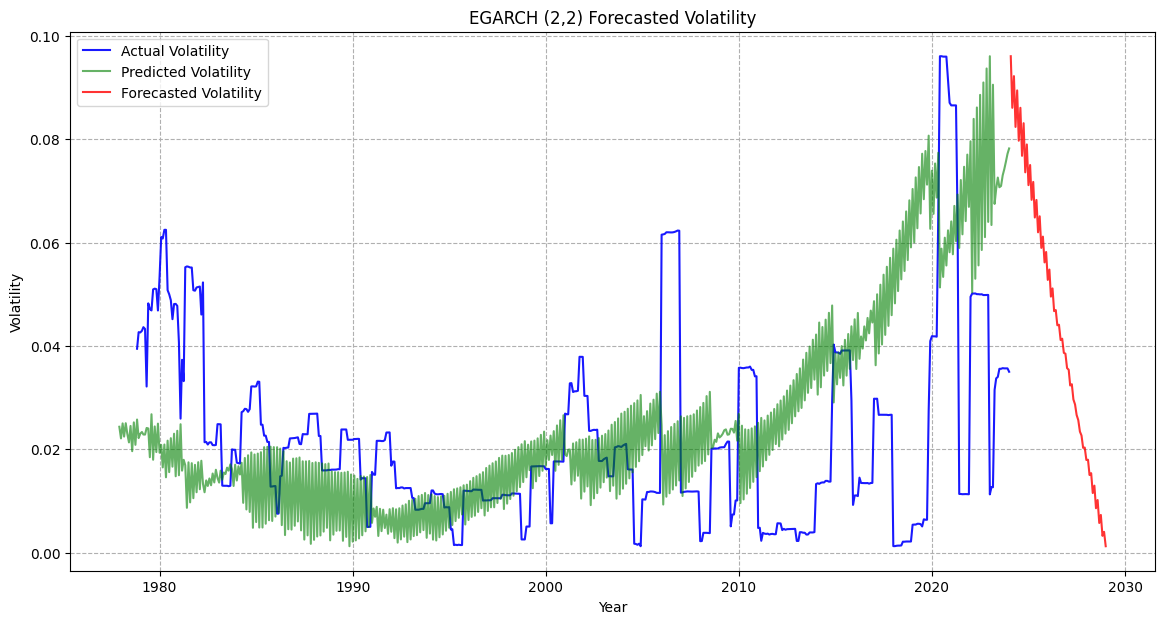

,Actual Volatility,"EGARCH (2,2) Predicted Volatility","EGARCH (2,2) Forecasted Volatility"
2023-11-01,0.035650,0.075648,0.000000
2023-12-01,0.035651,0.077164,0.000000
2024-01-01,0.034998,0.078213,0.000000
2024-02-01,0.000000,0.000000,0.096063
2024-03-01,0.000000,0.000000,0.086080
2024-04-01,0.000000,0.000000,0.092211
2024-05-01,0.000000,0.000000,0.082380
2024-06-01,0.000000,0.000000,0.089449
2024-07-01,0.000000,0.000000,0.079710
2024-08-01,0.000000,0.000000,0.086081


In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()

predicted_volatility = historical_volatility_egarch

min_length = min(len(actual_volatility), len(predicted_volatility))
actual_volatility = actual_volatility[-min_length:]
predicted_volatility = predicted_volatility[-min_length:]

actual_min, actual_max = actual_volatility.min(), actual_volatility.max()
predicted_min, predicted_max = predicted_volatility.min(), predicted_volatility.max()

predicted_volatility_scaled = ((predicted_volatility - predicted_min) / (predicted_max - predicted_min)) \
                              * (actual_max - actual_min) + actual_min

future_min, future_max = future_volatility_scaled_egarch.min(), future_volatility_scaled_egarch.max()

future_volatility_scaled = ((future_volatility_scaled_egarch - future_min) / (future_max - future_min)) \
                           * (actual_max - actual_min) + actual_min

last_historical_date = actual_volatility.index[-1]

start_of_next_month = pd.date_range(start=last_historical_date, periods=2, freq='MS')[1]

future_dates = pd.date_range(start=start_of_next_month, periods=len(future_volatility_scaled), freq='MS')

if len(future_dates) != len(future_volatility_scaled):
    future_dates = pd.date_range(start=start_of_next_month,
                                 periods=len(future_volatility_scaled),
                                 freq='MS')

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.9)
plt.plot(predicted_volatility.index, predicted_volatility_scaled, label='Predicted Volatility', color='green', alpha=0.6)
plt.plot(future_dates, future_volatility_scaled, label='Forecasted Volatility', color='red', alpha=0.8)
plt.title('EGARCH (2,2) Forecasted Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

future_volatility_scaled = pd.Series(future_volatility_scaled, index=future_dates)

combined_index = actual_volatility.index.union(future_dates)

actual_volatility_reindexed = actual_volatility.reindex(combined_index)
predicted_volatility_scaled_reindexed = predicted_volatility_scaled.reindex(combined_index)

volatility_df = pd.DataFrame({
    'Actual Volatility': actual_volatility_reindexed,
    'EGARCH (2,2) Predicted Volatility': predicted_volatility_scaled_reindexed,
    'EGARCH (2,2) Forecasted Volatility': future_volatility_scaled
})

volatility_df.fillna(0, inplace=True)
volatility_df.iloc[551:572]

****


# **EGARCH (2,2) Expanding Window Cross-Validation (EWCV)**








****

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/uni

EGARCH (2,2) Average MAE: 111.3795
EGARCH (2,2) Average MSE: 295392.6494
EGARCH (2,2) Average RMSE: 543.5004
EGARCH (2,2) Average MAPE: 807954.2459
EGARCH (2,2) Average MAD: 111.3795
EGARCH (2,2) Hit Rate: 0.479253112033
EGARCH (2,2) Low Volatility Error Variance: 218066.5191
EGARCH (2,2) Medium Volatility Error Variance: 510235.8217
EGARCH (2,2) High Volatility Error Variance: 119200.8025


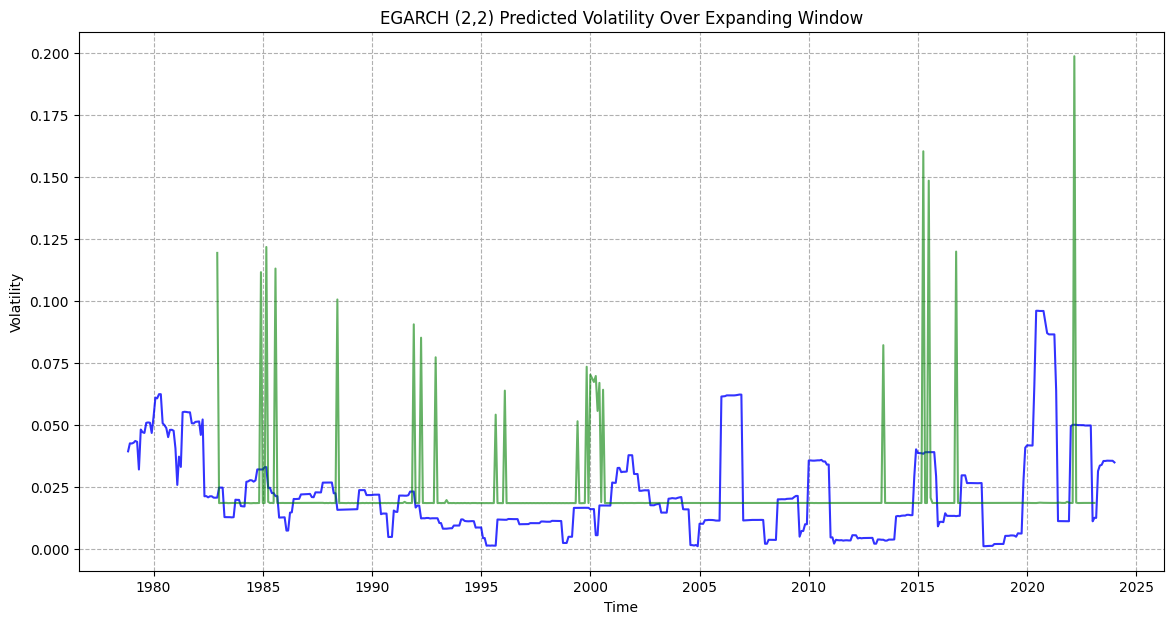

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message='The optimizer returned code 4')
warnings.filterwarnings('ignore', category=UserWarning, message='The optimizer returned code 9')


cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()
actual_volatility_df = pd.DataFrame(actual_volatility, index=cpi_pct_change.index, columns=['Actual Volatility'])
predictions_df = pd.DataFrame(index=actual_volatility_df.index[initial_window:], columns=['Predicted Volatility'])

mae_values = []
mse_values = []
mape_values = []
mad_values = []
actual_values = []
forecasted_values = []

for start in range(initial_window, len(actual_volatility_df) - window_size + 1):
    train_data = residuals_cpi2[:start]
    model_garch = arch_model(train_data, mean='Zero', vol='EGarch', p=2, q=2)
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', category=UserWarning)
        results_garch = model_garch.fit(disp='off', options={'maxiter': 10000, 'ftol': 1e-06, 'eps': 1e-08})
    forecasted_variance = results_garch.conditional_volatility[-1] ** 2
    forecasted_volatility = np.sqrt(forecasted_variance)
    predictions_df.iloc[start - initial_window] = forecasted_volatility
    if not np.isnan(actual_volatility.iloc[start + window_size - 1]):
        actual_values.append(actual_volatility.iloc[start + window_size - 1])
        forecasted_values.append(forecasted_volatility)

mean_actual = actual_volatility.mean()
std_actual = actual_volatility.std()
predictions_df['Predicted Volatility Scaled'] = predictions_df['Predicted Volatility'].astype(float).sub(predictions_df['Predicted Volatility'].astype(float).mean()).div(predictions_df['Predicted Volatility'].astype(float).std()).mul(std_actual).add(mean_actual)

for actual, predicted in zip(actual_values, forecasted_values):
    mape_values.append(np.abs((actual - predicted) / actual) * 100 if actual != 0 else np.nan)
    mse_values.append((actual - predicted) ** 2)
    mae_values.append(np.abs(actual - predicted))
    mad_values.append(np.abs(actual - predicted))

average_mape = np.nanmean(mape_values)
average_mse = np.nanmean(mse_values)
average_mae = np.nanmean(mae_values)
average_rmse = np.sqrt(average_mse)
average_mad = np.nanmean(mad_values)

print(f'EGARCH (2,2) Average MAE: {average_mae:.4f}')
print(f'EGARCH (2,2) Average MSE: {average_mse:.4f}')
print(f'EGARCH (2,2) Average RMSE: {average_rmse:.4f}')
print(f'EGARCH (2,2) Average MAPE: {average_mape:.4f}')
print(f"EGARCH (2,2) Average MAD: {average_mad:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_values)):
    actual_direction = np.sign(actual_values[i] - actual_values[i-1])
    forecast_direction = np.sign(forecasted_values[i] - forecasted_values[i-1])
    if actual_direction == forecast_direction and actual_direction != 0:
        hits += 1
    total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"EGARCH (2,2) Hit Rate: {hit_rate:.12f}")

market_conditions = np.percentile(actual_values, [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for actual, forecast in zip(actual_values, forecasted_values):
    error = np.abs(actual - forecast)
    if actual <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif actual <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"EGARCH (2,2) Low Volatility Error Variance: {np.var(low_volatility_errors):.4f}")
print(f"EGARCH (2,2) Medium Volatility Error Variance: {np.var(medium_volatility_errors):.4f}")
print(f"EGARCH (2,2) High Volatility Error Variance: {np.var(high_volatility_errors):.4f}")

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.8)
plt.plot(predictions_df.index, predictions_df['Predicted Volatility Scaled'], label='Scaled Predicted Volatility', color='green', alpha=0.6)
plt.title('EGARCH (2,2) Predicted Volatility Over Expanding Window')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--')
plt.show()

****


# **EGARCH (2,2) Purged Cross-Validation (PCV)**








****

No forecast available for start index: 210


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


EGARCH (2,2) Average MAE: 2.2666
EGARCH (2,2) Average MSE: 5.6302
EGARCH (2,2) Average RMSE: 2.3728
EGARCH (2,2) Average MAPE: 25773.5955
EGARCH (2,2) Average MAD: 2.2666
EGARCH (2,2) Hit Rate: 0.4367
EGARCH (2,2) Low Volatility Error Variance: 0.000095
EGARCH (2,2) Medium Volatility Error Variance: 0.000123
EGARCH (2,2) High Volatility Error Variance: 0.000456


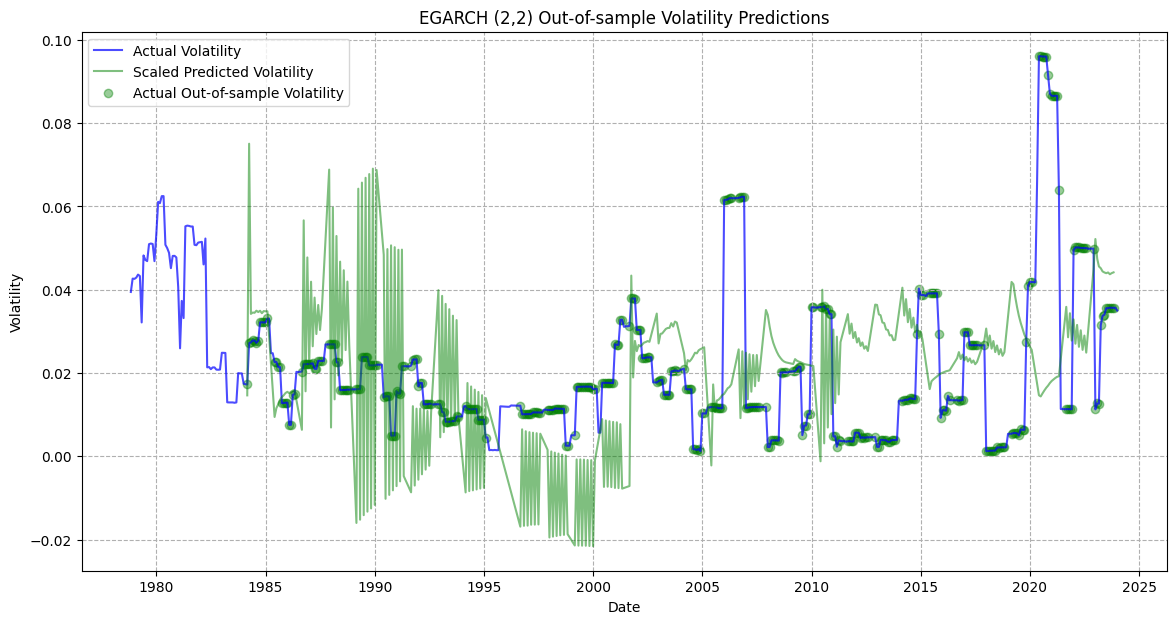

In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12

actual_volatility = cpi_pct_change.rolling(window=window_size).std()

out_sample_length = 12
purge_length = 3

mae_values = []
mse_values = []
mape_values = []

first_valid_index = actual_volatility.dropna().index[0]
initial_window = 60

forecasted_values = []
actual_values = []
forecast_dates = []

all_forecasts = []
all_actuals = []

for start in range(initial_window, len(cpi_pct_change) - out_sample_length, out_sample_length + purge_length):
    end_train = start + out_sample_length
    start_test = end_train + purge_length

    if start_test + out_sample_length > len(cpi_pct_change):
        continue

    train_data = residuals_cpi2.iloc[:end_train]

    model_garch = arch_model(train_data, mean='Zero', vol='EGarch', p=2, q=2)
    results_garch = model_garch.fit(disp='off')

    forecasts = results_garch.forecast(horizon=out_sample_length, method='simulation')

    if not forecasts.variance.dropna().empty:
        forecasted_variances = forecasts.variance.dropna().iloc[-1]
        forecasted_volatilities = np.sqrt(forecasted_variances)

        forecasted_values.extend(forecasted_volatilities)
        actual_values.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].values)
        forecast_dates.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].index)

        actual_test_volatility = actual_volatility.iloc[start_test:start_test + out_sample_length].values

        all_forecasts.extend(forecasted_volatilities)
        all_actuals.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].values)

        mae = mean_absolute_error(actual_test_volatility, forecasted_volatilities)
        mse = mean_squared_error(actual_test_volatility, forecasted_volatilities)

        mae_values.append(mae)
        mse_values.append(mse)

        mape = np.mean(np.abs((actual_test_volatility - forecasted_volatilities) / actual_test_volatility)) * 100
        mape_values.append(mape)
    else:
        print(f"No forecast available for start index: {start_test}")

mean_actual = np.nanmean(all_actuals)
std_actual = np.nanstd(all_actuals)

std_forecasts = np.nanstd(all_forecasts)
if std_forecasts == 0:
    std_forecasts = 1

scaled_forecasts = [(f - np.nanmean(all_forecasts)) / std_forecasts * std_actual + mean_actual for f in all_forecasts]


average_mae = np.mean(mae_values)
average_mse = np.mean(mse_values)
average_rmse = np.sqrt(average_mse)
average_mape = np.mean(mape_values)

print(f"EGARCH (2,2) Average MAE: {average_mae:.4f}")
print(f"EGARCH (2,2) Average MSE: {average_mse:.4f}")
print(f"EGARCH (2,2) Average RMSE: {average_rmse:.4f}")
print(f"EGARCH (2,2) Average MAPE: {average_mape:.4f}")

mad_values = []
for i in range(len(forecasted_values)):
    if not np.isnan(actual_values[i]):
        mad = np.abs(forecasted_values[i] - actual_values[i])
        mad_values.append(mad)

average_mad = np.nanmean(mad_values)
print(f"EGARCH (2,2) Average MAD: {average_mad:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_values)):
    if not np.isnan(actual_values[i]) and not np.isnan(actual_values[i-1]) and not np.isnan(forecasted_values[i]):
        actual_change = actual_values[i] > actual_values[i-1]
        forecast_change = forecasted_values[i] > forecasted_values[i-1]
        if actual_change == forecast_change:
            hits += 1
        total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"EGARCH (2,2) Hit Rate: {hit_rate:.4f}")

market_conditions = np.percentile(all_actuals, [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for i in range(len(all_actuals)):
    error = np.abs(all_actuals[i] - scaled_forecasts[i])
    if all_actuals[i] <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif all_actuals[i] <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"EGARCH (2,2) Low Volatility Error Variance: {np.var(low_volatility_errors):.6f}")
print(f"EGARCH (2,2) Medium Volatility Error Variance: {np.var(medium_volatility_errors):.6f}")
print(f"EGARCH (2,2) High Volatility Error Variance: {np.var(high_volatility_errors):.6f}")

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.7)
plt.plot(forecast_dates, scaled_forecasts, color='green', label='Scaled Predicted Volatility', alpha=0.5)
plt.scatter(forecast_dates, all_actuals, color='green', label='Actual Out-of-sample Volatility', alpha=0.4)
plt.title('EGARCH (2,2) Out-of-sample Volatility Predictions')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

****

# **TGARCH (Threshold Generalized Autoregressive Conditional Heteroskedasticity)**

### **Focuses on capturing the 'leverage effect', where negative shocks have a different impact on volatility compared to positive shocks.**

### **Incorporates an indicator function that splits the shocks into positive and negative, with separate coefficients for each.**


$\sigma_t^2 = \omega + \left( \alpha + \gamma I_{[\epsilon_{t-1} < 0]} \right) \epsilon_{t-1}^2 + \beta \sigma_{t-1}^2$

$\text{where:}$

$\sigma_t^2$: The conditional variance at time $t$, representing the expected level of variance at time $t$ based on all available information up to time $t-1$.

$\omega$: A constant term that affects the level of the conditional variance, ensuring that the variance has a positive value even in the absence of large shocks or past high volatility.

$\alpha$: A coefficient that captures the impact of the squared residuals from the previous time period on the current conditional variance. It reflects how past volatility influences current volatility.

$\beta$: A coefficient for the past conditional variance, indicating the persistence of volatility over time. High values suggest that volatility shocks have long-lasting effects.

$\epsilon_t$: The residual from the mean model at time $t$, representing the difference between the observed value and the value predicted by the model.

$\gamma$: A coefficient that captures the asymmetry in the impact of shocks. It specifically modifies the influence of negative shocks on the current volatility.

$I_{[\epsilon_{t-1} < 0]}$: An indicator function that is equal to 1 if the previous period's shock was negative ($\epsilon_{t-1} < 0$), and 0 otherwise. This function allows the model to differentiate the impact of positive and negative shocks on volatility.



****

In [ ]:
model_tgarch = arch_model(residuals_cpi2, mean='Zero', vol='Garch', p=1, o=1, q=1)
results_tgarch = model_tgarch.fit(disp='off')
print(results_tgarch.summary())
historical_volatility_tgarch = results_tgarch.conditional_volatility

                     Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1437.25
Distribution:                  Normal   AIC:                           2882.50
Method:            Maximum Likelihood   BIC:                           2899.78
                                        No. Observations:                  555
Date:                Sun, Apr 21 2024   Df Residuals:                      555
Time:                        22:06:14   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0296  7.804e-02      0.379      0.705 

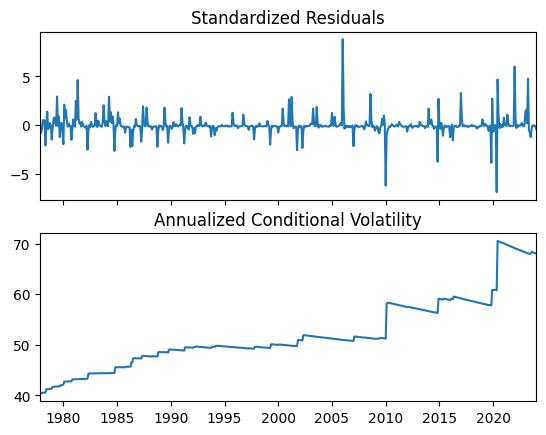

In [ ]:
fig = results_tgarch.plot(annualize='D')
plt.show()

****


# **Grid Search for TGARCH Model**


****

In [ ]:
p_range = range(0, 3)
q_range = range(0, 3)
o_range = range(0, 3)

best_log_likelihood = -np.inf
best_aic = np.inf
best_bic = np.inf
best_p = 0
best_q = 0
best_o = 0
best_model = None

for p in p_range:
    for q in q_range:
        for o in o_range:
            try:
                model_tgarch = arch_model(residuals_cpi2, mean='Zero', vol='GARCH', p=p, o=o, q=q)
                results_tgarch = model_tgarch.fit(disp='off')

                current_aic = results_tgarch.aic
                current_bic = results_tgarch.bic
                current_log_likelihood = results_tgarch.loglikelihood

                if (current_log_likelihood > best_log_likelihood) or \
                   (current_log_likelihood == best_log_likelihood and current_aic < best_aic) or \
                   (current_log_likelihood == best_log_likelihood and current_aic == best_aic and current_bic < best_bic):
                    best_log_likelihood = current_log_likelihood
                    best_aic = current_aic
                    best_bic = current_bic
                    best_p = p
                    best_q = q
                    best_o = o
                    best_model = results_tgarch

            except Exception as e:
                print(f"Could not fit TGARCH({p},{o},{q}) model: {e}")

if best_model:
    print(f"Best model TGARCH({best_p},{best_o},{best_q}) based on Log Likelihood, AIC, and BIC")
    print(best_model.summary())
    historical_volatility_tgarch = best_model.conditional_volatility
    residuals_tgarch_best = best_model.resid
else:
    print("No suitable model was found.")

Could not fit TGARCH(0,0,0) model: One of p or o must be strictly positive
Could not fit TGARCH(0,0,1) model: One of p or o must be strictly positive
Could not fit TGARCH(0,0,2) model: One of p or o must be strictly positive
Best model TGARCH(1,2,2) based on Log Likelihood, AIC, and BIC
                     Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1435.59
Distribution:                  Normal   AIC:                           2883.17
Method:            Maximum Likelihood   BIC:                           2909.09
                                        No. Observations:                  555
Date:                Sun, Apr 21 2024   Df Residuals:                      555
Time:                        22:06:17   Df Model:                            0
 

****



# **Bonferroni and Benjamini-Hochberg Corrections of TGARCH (1,2,2) P-Values**



****

In [ ]:
p_values = best_model.pvalues

names = best_model.params.index

bonferroni_results = multipletests(p_values, alpha=0.15, method='bonferroni')
print("Bonferroni Corrected p-values:")
for name, p_value, bf_corrected_p_value in zip(names, p_values, bonferroni_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bf_corrected_p_value:.6f}")

bh_results = multipletests(p_values, alpha=0.15, method='fdr_bh')
print("Benjamini-Hochberg Corrected p-values:")
for name, p_value, bh_corrected_p_value in zip(names, p_values, bh_results[1]):
    print(f"{name}: original p-value = {p_value:.6f}, corrected p-value = {bh_corrected_p_value:.6f}")

df_results = pd.DataFrame({
    'TGARCH (1,2,2) Coefficient': names,
    'Original P-Value': p_values,
    'Bonferroni Corrected P-Value': bonferroni_results[1],
    'BH Corrected P-Value': bh_results[1]
})

df_results

Bonferroni Corrected p-values:
omega: original p-value = 0.678823, corrected p-value = 1.000000
alpha[1]: original p-value = 0.999994, corrected p-value = 1.000000
gamma[1]: original p-value = 0.693934, corrected p-value = 1.000000
gamma[2]: original p-value = 0.999999, corrected p-value = 1.000000
beta[1]: original p-value = 0.821733, corrected p-value = 1.000000
beta[2]: original p-value = 0.625408, corrected p-value = 1.000000
Benjamini-Hochberg Corrected p-values:
omega: original p-value = 0.678823, corrected p-value = 0.999999
alpha[1]: original p-value = 0.999994, corrected p-value = 0.999999
gamma[1]: original p-value = 0.693934, corrected p-value = 0.999999
gamma[2]: original p-value = 0.999999, corrected p-value = 0.999999
beta[1]: original p-value = 0.821733, corrected p-value = 0.999999
beta[2]: original p-value = 0.625408, corrected p-value = 0.999999


,"TGARCH (1,2,2) Coefficient",Original P-Value,Bonferroni Corrected P-Value,BH Corrected P-Value
omega,omega,0.678823,1.0,0.999999
alpha[1],alpha[1],0.999994,1.0,0.999999
gamma[1],gamma[1],0.693934,1.0,0.999999
gamma[2],gamma[2],0.999999,1.0,0.999999
beta[1],beta[1],0.821733,1.0,0.999999
beta[2],beta[2],0.625408,1.0,0.999999


****

# **TGARCH (1,2,2) Predicted Volatility**



****

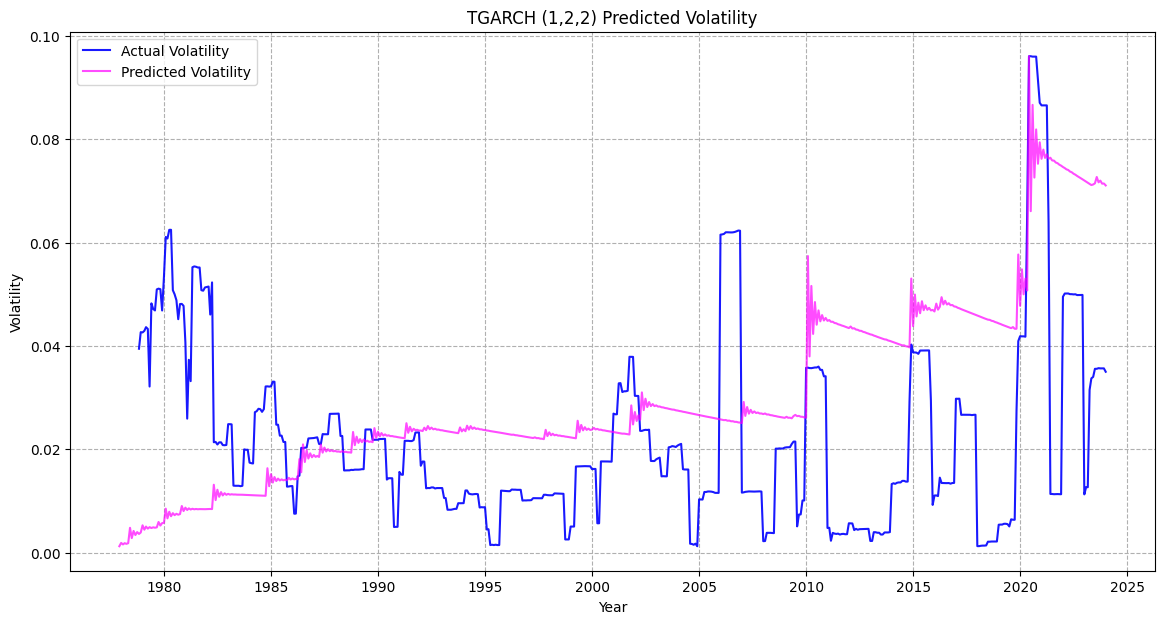

TGARCH (1,2,2) MAPE: 260.19276620529104
TGARCH (1,2,2) RMSE: 0.02430485452724383
TGARCH (1,2,2) MAE: 0.01924879291695829
TGARCH (1,2,2) MSE: 0.0005907259535904848
TGARCH (1,2,2)) Average MAD: 0.0192
TGARCH (1,2,2) Hit Rate: 0.457504520796
TGARCH (1,2,2) Low Volatility Error Variance: 0.000224
TGARCH (1,2,2) Medium Volatility Error Variance: 0.000097
TGARCH (1,2,2) High Volatility Error Variance: 0.000274


In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()

predicted_volatility = historical_volatility_tgarch

min_length = min(len(actual_volatility), len(predicted_volatility))
actual_volatility = actual_volatility[-min_length:]
predicted_volatility = predicted_volatility[-min_length:]

actual_min, actual_max = actual_volatility.min(), actual_volatility.max()
predicted_min, predicted_max = predicted_volatility.min(), predicted_volatility.max()

predicted_volatility_scaled = ((predicted_volatility - predicted_min) / (predicted_max - predicted_min)) \
                              * (actual_max - actual_min) + actual_min

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.9)
plt.plot(predicted_volatility.index, predicted_volatility_scaled, label='Predicted Volatility', color='magenta', alpha=0.7)
plt.title('TGARCH (1,2,2) Predicted Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

mape_egarch = np.mean(np.abs((actual_volatility - predicted_volatility_scaled) / actual_volatility)) * 100
rmse_egarch = np.sqrt(np.mean((actual_volatility - predicted_volatility_scaled)**2))
mae_egarch = np.mean(np.abs(actual_volatility - predicted_volatility_scaled))
mse_egarch = np.mean((actual_volatility - predicted_volatility_scaled)**2)
mad_egarch = np.mean(np.abs(actual_volatility - predicted_volatility_scaled))

print("TGARCH (1,2,2) MAPE:", mape_egarch)
print("TGARCH (1,2,2) RMSE:", rmse_egarch)
print("TGARCH (1,2,2) MAE:", mae_egarch)
print("TGARCH (1,2,2) MSE:", mse_egarch)
print(f"TGARCH (1,2,2)) Average MAD: {mad_egarch:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_volatility)):
    actual_direction = np.sign(actual_volatility.iloc[i] - actual_volatility.iloc[i-1])
    predicted_direction = np.sign(predicted_volatility_scaled.iloc[i] - predicted_volatility_scaled.iloc[i-1])
    if actual_direction == predicted_direction and actual_direction != 0:
        hits += 1
    total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"TGARCH (1,2,2) Hit Rate: {hit_rate:.12f}")

market_conditions = np.percentile(actual_volatility.dropna(), [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for actual, predicted in zip(actual_volatility.dropna(), predicted_volatility_scaled.dropna()):
    error = np.abs(actual - predicted)
    if actual <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif market_conditions[0] < actual <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"TGARCH (1,2,2) Low Volatility Error Variance: {np.nanvar(low_volatility_errors):.6f}")
print(f"TGARCH (1,2,2) Medium Volatility Error Variance: {np.nanvar(medium_volatility_errors):.6f}")
print(f"TGARCH (1,2,2) High Volatility Error Variance: {np.nanvar(high_volatility_errors):.6f}")

volatility_df = pd.DataFrame({
    'Actual Volatility': actual_volatility,
    'TGARCH (1,2,2) Predicted Volatility': predicted_volatility_scaled
})

****

# **TGARCH (1,2,2) Forecasted Volatility**



****

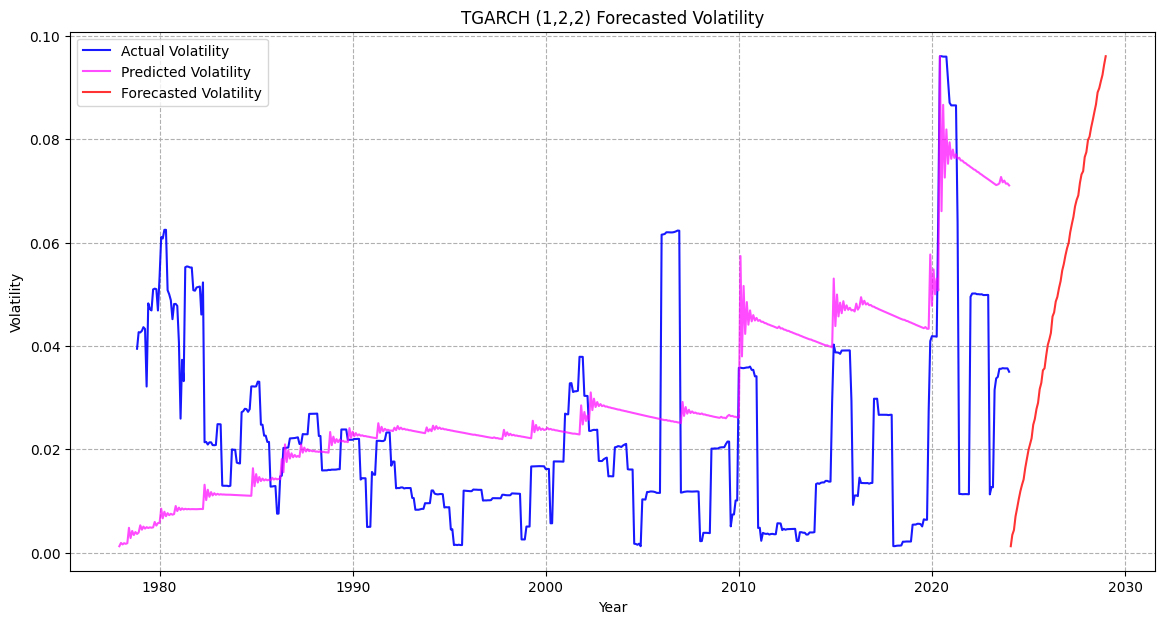

,Actual Volatility,"TGARCH (1,2,2) Predicted Volatility","TGARCH (1,2,2) Forecasted Volatility"
2023-11-01,0.035650,0.071401,0.000000
2023-12-01,0.035651,0.071434,0.000000
2024-01-01,0.034998,0.071058,0.000000
2024-02-01,0.000000,0.000000,0.001234
2024-03-01,0.000000,0.000000,0.003420
2024-04-01,0.000000,0.000000,0.004364
2024-05-01,0.000000,0.000000,0.007002
2024-06-01,0.000000,0.000000,0.008643
2024-07-01,0.000000,0.000000,0.010325
2024-08-01,0.000000,0.000000,0.011892


In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()

predicted_volatility = historical_volatility_tgarch

min_length = min(len(actual_volatility), len(predicted_volatility))
actual_volatility = actual_volatility[-min_length:]
predicted_volatility = predicted_volatility[-min_length:]

actual_min, actual_max = actual_volatility.min(), actual_volatility.max()
predicted_min, predicted_max = predicted_volatility.min(), predicted_volatility.max()

predicted_volatility_scaled = ((predicted_volatility - predicted_min) / (predicted_max - predicted_min)) \
                              * (actual_max - actual_min) + actual_min

future_min, future_max = future_volatility_scaled_tgarch.min(), future_volatility_scaled_tgarch.max()

future_volatility_scaled = ((future_volatility_scaled_tgarch - future_min) / (future_max - future_min)) \
                           * (actual_max - actual_min) + actual_min

if len(future_dates) != len(future_volatility_scaled):
    future_dates = pd.date_range(start=start_of_next_month,
                                 periods=len(future_volatility_scaled),
                                 freq='MS')

last_historical_date = actual_volatility.index[-1]

start_of_next_month = pd.date_range(start=last_historical_date, periods=2, freq='MS')[1]

future_dates = pd.date_range(start=start_of_next_month, periods=len(future_volatility_scaled), freq='MS')

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.9)
plt.plot(predicted_volatility.index, predicted_volatility_scaled, label='Predicted Volatility', color='magenta', alpha=0.7)
plt.plot(future_dates, future_volatility_scaled, label='Forecasted Volatility', color='red', alpha=0.8)
plt.title('TGARCH (1,2,2) Forecasted Volatility')
plt.xlabel('Year')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

future_volatility_scaled = pd.Series(future_volatility_scaled, index=future_dates)

combined_index = actual_volatility.index.union(future_dates)

actual_volatility_reindexed = actual_volatility.reindex(combined_index)
predicted_volatility_scaled_reindexed = predicted_volatility_scaled.reindex(combined_index)

volatility_df = pd.DataFrame({
    'Actual Volatility': actual_volatility_reindexed,
    'TGARCH (1,2,2) Predicted Volatility': predicted_volatility_scaled_reindexed,
    'TGARCH (1,2,2) Forecasted Volatility': future_volatility_scaled
})

volatility_df.fillna(0, inplace=True)
volatility_df.iloc[551:572]

****

# **TGARCH (1,2,2) Expanding Window Cross-Validation (EWCV)**



****

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


TGARCH (1,2,2) Average MAE: 2.4986
TGARCH (1,2,2) Average MSE: 7.0530
TGARCH (1,2,2) Average RMSE: 2.6557
TGARCH (1,2,2) Average MAPE: 27555.2856
TGARCH (1,2,2) Average MAD: 2.4986
TGARCH (1,2,2) Hit Rate: 0.400414937759
TGARCH (1,2,2) Low Volatility Error Variance: 1.0121
TGARCH (1,2,2) Medium Volatility Error Variance: 0.8768
TGARCH (1,2,2) High Volatility Error Variance: 0.5319


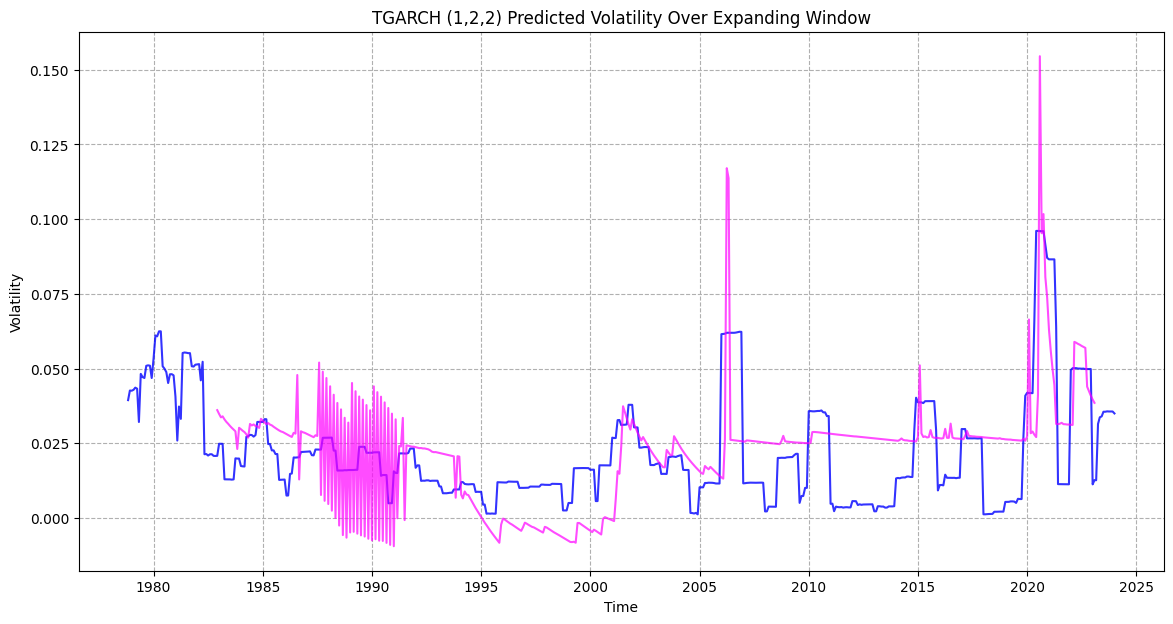

In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12
actual_volatility = cpi_pct_change.rolling(window=window_size).std()
actual_volatility_df = pd.DataFrame(actual_volatility, index=cpi_pct_change.index, columns=['Actual Volatility'])
predictions_df = pd.DataFrame(index=actual_volatility_df.index[initial_window:], columns=['Predicted Volatility'])

mae_values = []
mse_values = []
mape_values = []
mad_values = []
actual_values = []
forecasted_values = []

for start in range(initial_window, len(actual_volatility_df) - window_size + 1):
    train_data = residuals_cpi2[:start]
    model_garch = arch_model(train_data, mean='Zero', vol='Garch', p=1, o=2, q=2)
    results_garch = model_garch.fit(disp='off', options={'maxiter': 10000, 'ftol': 1e-06, 'eps': 1e-08})
    forecasted_variance = results_garch.conditional_volatility[-1] ** 2
    forecasted_volatility = np.sqrt(forecasted_variance)
    predictions_df.iloc[start - initial_window] = forecasted_volatility
    if not np.isnan(actual_volatility.iloc[start + window_size - 1]):
        actual_values.append(actual_volatility.iloc[start + window_size - 1])
        forecasted_values.append(forecasted_volatility)

mean_actual = actual_volatility.mean()
std_actual = actual_volatility.std()
predictions_df['Predicted Volatility Scaled'] = predictions_df['Predicted Volatility'].astype(float).sub(predictions_df['Predicted Volatility'].astype(float).mean()).div(predictions_df['Predicted Volatility'].astype(float).std()).mul(std_actual).add(mean_actual)

for actual, predicted in zip(actual_values, forecasted_values):
    mape_values.append(np.abs((actual - predicted) / actual) * 100 if actual != 0 else np.nan)
    mse_values.append((actual - predicted) ** 2)
    mae_values.append(np.abs(actual - predicted))
    mad_values.append(np.abs(actual - predicted))

average_mape = np.nanmean(mape_values)
average_mse = np.nanmean(mse_values)
average_mae = np.nanmean(mae_values)
average_rmse = np.sqrt(average_mse)
average_mad = np.nanmean(mad_values)

print(f'TGARCH (1,2,2) Average MAE: {average_mae:.4f}')
print(f'TGARCH (1,2,2) Average MSE: {average_mse:.4f}')
print(f'TGARCH (1,2,2) Average RMSE: {average_rmse:.4f}')
print(f'TGARCH (1,2,2) Average MAPE: {average_mape:.4f}')
print(f"TGARCH (1,2,2) Average MAD: {average_mad:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_values)):
    actual_direction = np.sign(actual_values[i] - actual_values[i-1])
    forecast_direction = np.sign(forecasted_values[i] - forecasted_values[i-1])
    if actual_direction == forecast_direction and actual_direction != 0:
        hits += 1
    total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"TGARCH (1,2,2) Hit Rate: {hit_rate:.12f}")

market_conditions = np.percentile(actual_values, [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for actual, forecast in zip(actual_values, forecasted_values):
    error = np.abs(actual - forecast)
    if actual <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif actual <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"TGARCH (1,2,2) Low Volatility Error Variance: {np.var(low_volatility_errors):.4f}")
print(f"TGARCH (1,2,2) Medium Volatility Error Variance: {np.var(medium_volatility_errors):.4f}")
print(f"TGARCH (1,2,2) High Volatility Error Variance: {np.var(high_volatility_errors):.4f}")

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.8)
plt.plot(predictions_df.index, predictions_df['Predicted Volatility Scaled'], label='Scaled Predicted Volatility', color='magenta', alpha=0.7)
plt.title('TGARCH (1,2,2) Predicted Volatility Over Expanding Window')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--')
plt.show()

****

# **TGARCH (1,2,2) Purged Cross-Validation (PCV)**



****

TGARCH (1,2,2) Average MAE: 2.4989
TGARCH (1,2,2) Average MSE: 6.8543
TGARCH (1,2,2) Average RMSE: 2.6181
TGARCH (1,2,2) Average MAPE: 28391.4082
TGARCH (1,2,2) Average MAD: 2.4989
TGARCH (1,2,2) Hit Rate: 0.5509
TGARCH (1,2,2) Low Volatility Error Variance: 0.000038
TGARCH (1,2,2) Medium Volatility Error Variance: 0.000124
TGARCH (1,2,2) High Volatility Error Variance: 0.000344


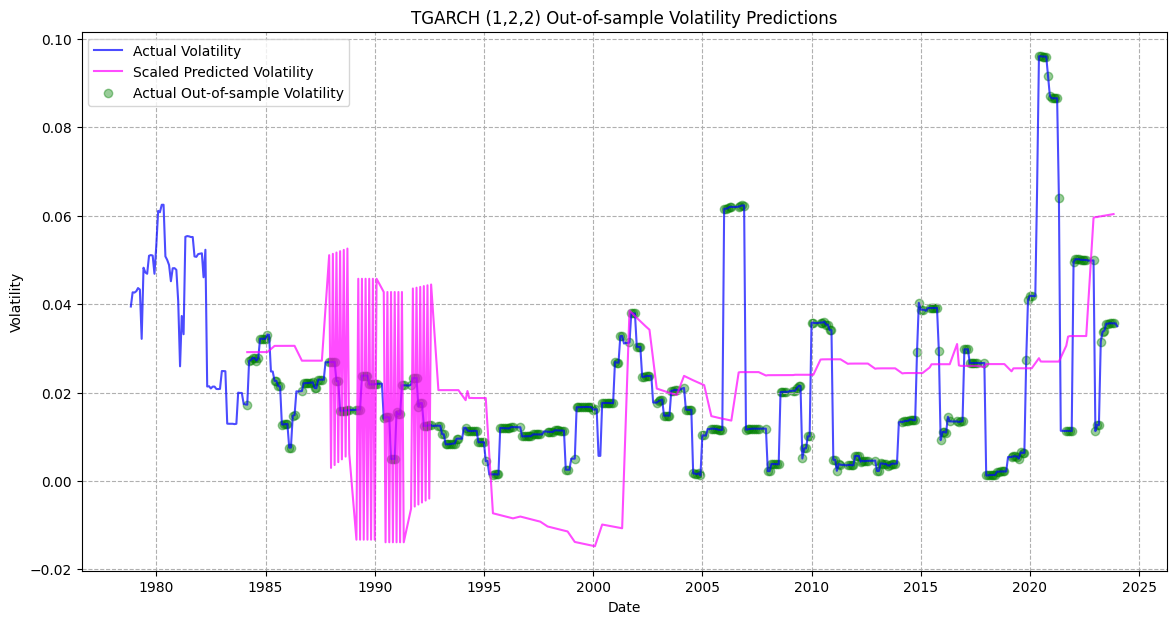

In [ ]:
cpi_pct_change = CPI['Consumer_Price_Index'].pct_change().dropna()

window_size = 12

actual_volatility = cpi_pct_change.rolling(window=window_size).std()

out_sample_length = 12
purge_length = 3

mae_values = []
mse_values = []
mape_values = []

first_valid_index = actual_volatility.dropna().index[0]
initial_window = 60

forecasted_values = []
actual_values = []
forecast_dates = []

all_forecasts = []
all_actuals = []

for start in range(initial_window, len(cpi_pct_change) - out_sample_length, out_sample_length + purge_length):
    end_train = start + out_sample_length
    start_test = end_train + purge_length

    if start_test + out_sample_length > len(cpi_pct_change):
        continue

    train_data = residuals_cpi2.iloc[:end_train]

    model_garch = arch_model(train_data, mean='Zero', vol='Garch', p=1, o=2, q=2)
    results_garch = model_garch.fit(disp='off', options={'maxiter': 10000, 'ftol': 1e-06, 'eps': 1e-08})

    forecasts = results_garch.forecast(horizon=out_sample_length)

    if not forecasts.variance.dropna().empty:
        forecasted_variances = forecasts.variance.dropna().iloc[-1]
        forecasted_volatilities = np.sqrt(forecasted_variances)

        forecasted_values.extend(forecasted_volatilities)
        actual_values.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].values)
        forecast_dates.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].index)

        actual_test_volatility = actual_volatility.iloc[start_test:start_test + out_sample_length].values

        all_forecasts.extend(forecasted_volatilities)
        all_actuals.extend(actual_volatility.iloc[start_test:start_test + out_sample_length].values)

        mae = mean_absolute_error(actual_test_volatility, forecasted_volatilities)
        mse = mean_squared_error(actual_test_volatility, forecasted_volatilities)

        mae_values.append(mae)
        mse_values.append(mse)

        mape = np.mean(np.abs((actual_test_volatility - forecasted_volatilities) / actual_test_volatility)) * 100
        mape_values.append(mape)
    else:
        print(f"No forecast available for start index: {start_test}")

mean_actual = np.nanmean(all_actuals)
std_actual = np.nanstd(all_actuals)

std_forecasts = np.nanstd(all_forecasts)
if std_forecasts == 0:
    std_forecasts = 1

scaled_forecasts = [(f - np.nanmean(all_forecasts)) / std_forecasts * std_actual + mean_actual for f in all_forecasts]


average_mae = np.mean(mae_values)
average_mse = np.mean(mse_values)
average_rmse = np.sqrt(average_mse)
average_mape = np.mean(mape_values)

print(f"TGARCH (1,2,2) Average MAE: {average_mae:.4f}")
print(f"TGARCH (1,2,2) Average MSE: {average_mse:.4f}")
print(f"TGARCH (1,2,2) Average RMSE: {average_rmse:.4f}")
print(f"TGARCH (1,2,2) Average MAPE: {average_mape:.4f}")

mad_values = []
for i in range(len(forecasted_values)):
    if not np.isnan(actual_values[i]):
        mad = np.abs(forecasted_values[i] - actual_values[i])
        mad_values.append(mad)

average_mad = np.nanmean(mad_values)
print(f"TGARCH (1,2,2) Average MAD: {average_mad:.4f}")

hits = 0
total_predictions = 0
for i in range(1, len(actual_values)):
    if not np.isnan(actual_values[i]) and not np.isnan(actual_values[i-1]) and not np.isnan(forecasted_values[i]):
        actual_change = actual_values[i] > actual_values[i-1]
        forecast_change = forecasted_values[i] > forecasted_values[i-1]
        if actual_change == forecast_change:
            hits += 1
        total_predictions += 1

hit_rate = hits / total_predictions if total_predictions > 0 else 0
print(f"TGARCH (1,2,2) Hit Rate: {hit_rate:.4f}")

market_conditions = np.percentile(all_actuals, [33, 66])
low_volatility_errors = []
medium_volatility_errors = []
high_volatility_errors = []

for i in range(len(all_actuals)):
    error = np.abs(all_actuals[i] - scaled_forecasts[i])
    if all_actuals[i] <= market_conditions[0]:
        low_volatility_errors.append(error)
    elif all_actuals[i] <= market_conditions[1]:
        medium_volatility_errors.append(error)
    else:
        high_volatility_errors.append(error)

print(f"TGARCH (1,2,2) Low Volatility Error Variance: {np.var(low_volatility_errors):.6f}")
print(f"TGARCH (1,2,2) Medium Volatility Error Variance: {np.var(medium_volatility_errors):.6f}")
print(f"TGARCH (1,2,2) High Volatility Error Variance: {np.var(high_volatility_errors):.6f}")

plt.figure(figsize=(14, 7))
plt.plot(actual_volatility.index, actual_volatility, label='Actual Volatility', color='blue', alpha=0.7)
plt.plot(forecast_dates, scaled_forecasts, color='magenta', label='Scaled Predicted Volatility', alpha=0.7)
plt.scatter(forecast_dates, all_actuals, color='green', label='Actual Out-of-sample Volatility', alpha=0.4)
plt.title('TGARCH (1,2,2) Out-of-sample Volatility Predictions')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()